<a href="https://colab.research.google.com/github/Khalil-Salama/Chicago-crime-data/blob/main/Chicago_crime_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
###mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)


In [6]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [7]:
import shutil
# Assuming the uploaded file name is Chicago_Crime_2001-2022.zip
# If you uploaded a different file name, please change it here.
source_path = "Chicago_Crime_2001-2022.zip"
destination_path = "/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/Chicago crime data/" + os.path.basename(source_path)

try:
    shutil.copy(source_path, destination_path)
    print(f"Successfully copied {source_path} to {destination_path}")
except FileNotFoundError:
    print(f"Error: Source file not found at {source_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Error: Source file not found at Chicago_Crime_2001-2022.zip


In [8]:
import zipfile

# Path to the zip file in your Google Drive
zip_file_path = "/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/Chicago crime data/Chicago_Crime_2001-2022.zip"

# Directory to extract the contents to (within the Colab environment)
extracted_path = "/content/extracted_data"

# Create the extraction directory if it doesn't exist
if not os.path.exists(extracted_path):
    os.makedirs(extracted_path)

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zf:
        zf.extractall(extracted_path)
    print(f"Successfully extracted data to {extracted_path}")
except FileNotFoundError:
    print(f"Error: Zip file not found at {zip_file_path}")
except Exception as e:
    print(f"An error occurred during extraction: {e}")

Successfully extracted data to /content/extracted_data


In [9]:
extracted_path = "/content/extracted_data/Data" # Assuming the data is in a 'Data' subfolder

# List files in the extracted directory
extracted_files = os.listdir(extracted_path)
print("Files extracted:")
for file in extracted_files:
    print(file)

# List to hold DataFrames from each CSV
dataframes = []

# Iterate through extracted files and load all CSVs
for file in extracted_files:
    if file.endswith('.csv'):
        csv_file_path = os.path.join(extracted_path, file)
        try:
            # Load the CSV into a pandas DataFrame
            df_single = pd.read_csv(csv_file_path)
            dataframes.append(df_single)
            print(f"Successfully loaded {os.path.basename(csv_file_path)}.")
        except Exception as e:
            print(f"Error loading the CSV file {os.path.basename(csv_file_path)}: {e}")

# Concatenate all DataFrames into a single one
if dataframes:
    df = pd.concat(dataframes, ignore_index=True)
    print(f"\nSuccessfully combined {len(dataframes)} CSV files into a single DataFrame.")
    display(df.head()) # Display the first few rows of the combined DataFrame
    display(df.info()) # Display info about the combined DataFrame
else:
    print("\nNo CSV files found in the extracted data to combine.")

Files extracted:
Chicago-Crime_2015.csv
Chicago-Crime_2013.csv
Chicago-Crime_2005.csv
Chicago-Crime_2003.csv
Chicago-Crime_2007.csv
Chicago-Crime_2017.csv
Chicago-Crime_2022.csv
Chicago-Crime_2001.csv
Chicago-Crime_2006.csv
Chicago-Crime_2018.csv
Chicago-Crime_2012.csv
Chicago-Crime_2016.csv
Chicago-Crime_2014.csv
Chicago-Crime_2002.csv
Chicago-Crime_2021.csv
Chicago-Crime_2008.csv
Chicago-Crime_2011.csv
Chicago-Crime_2019.csv
Chicago-Crime_2020.csv
Chicago-Crime_2009.csv
README.txt
Chicago-Crime_2004.csv
Chicago-Crime_2010.csv
Successfully loaded Chicago-Crime_2015.csv.
Successfully loaded Chicago-Crime_2013.csv.
Successfully loaded Chicago-Crime_2005.csv.
Successfully loaded Chicago-Crime_2003.csv.
Successfully loaded Chicago-Crime_2007.csv.
Successfully loaded Chicago-Crime_2017.csv.
Successfully loaded Chicago-Crime_2022.csv.
Successfully loaded Chicago-Crime_2001.csv.
Successfully loaded Chicago-Crime_2006.csv.
Successfully loaded Chicago-Crime_2018.csv.
Successfully loaded Chicag

ID                    Date     Primary Type     Description  \
0  9911752  01/01/2015 01:00:00 AM            THEFT  $500 AND UNDER   
1  9911420  01/01/2015 01:00:00 AM         BURGLARY  FORCIBLE ENTRY   
2  9913130  01/01/2015 01:00:00 AM            THEFT  $500 AND UNDER   
3  9929911  01/01/2015 01:00:00 AM  CRIMINAL DAMAGE     TO PROPERTY   
4  9911705  01/01/2015 01:00:00 AM            THEFT  $500 AND UNDER   

  Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0               STREET   False     False   432       4.0  10.0  41.717170   
1     RESIDENCE-GARAGE   False     False  1222      12.0  28.0  41.882807   
2        BAR OR TAVERN   False     False   131       1.0   2.0  41.853853   
3            RESIDENCE   False     False  1921      19.0  47.0  41.951118   
4        BAR OR TAVERN   False     False  1924      19.0  44.0  41.946242   

   Longitude  
0 -87.534078  
1 -87.705031  
2 -87.625519  
3 -87.679881  
4 -87.655743

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


None

## Examining the data and seting date_time and index

In [10]:
#Let's examine 1 value from our Crime Date Time column.
test_date = df.loc[0, 'Date']
test_date

'01/01/2015 01:00:00 AM'

In [11]:
test_datetime = pd.to_datetime(test_date)
test_datetime

Timestamp('2015-01-01 01:00:00')

In [12]:
#Preparing the Date Time Index
#Let's convert this to a Pandas datetime:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
###make our datetime index
df = df.set_index('Date')
df.head(3)

ID Primary Type     Description  \
Date                                                        
2015-01-01 01:00:00  9911752        THEFT  $500 AND UNDER   
2015-01-01 01:00:00  9911420     BURGLARY  FORCIBLE ENTRY   
2015-01-01 01:00:00  9913130        THEFT  $500 AND UNDER   

                    Location Description  Arrest  Domestic  Beat  District  \
Date                                                                         
2015-01-01 01:00:00               STREET   False     False   432       4.0   
2015-01-01 01:00:00     RESIDENCE-GARAGE   False     False  1222      12.0   
2015-01-01 01:00:00        BAR OR TAVERN   False     False   131       1.0   

                     Ward   Latitude  Longitude  
Date                                             
2015-01-01 01:00:00  10.0  41.717170 -87.534078  
2015-01-01 01:00:00  28.0  41.882807 -87.705031  
2015-01-01 01:00:00   2.0  41.853853 -87.625519

# Holiday

### Adding holidays to the data set



In [14]:
!pip install holidays

In [15]:
import holidays
import datetime as dt
from holidays import country_holidays

In [16]:
## making a date range that covers full dataset
all_days = pd.date_range(df.index.min(), df.index.max())
all_days

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [17]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [18]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [19]:
## Saving holiday types as columns
df["US Holiday"] = [us_holidays.get(day) for day in df.index]
df.head()

ID     Primary Type     Description  \
Date                                                            
2015-01-01 01:00:00  9911752            THEFT  $500 AND UNDER   
2015-01-01 01:00:00  9911420         BURGLARY  FORCIBLE ENTRY   
2015-01-01 01:00:00  9913130            THEFT  $500 AND UNDER   
2015-01-01 01:00:00  9929911  CRIMINAL DAMAGE     TO PROPERTY   
2015-01-01 01:00:00  9911705            THEFT  $500 AND UNDER   

                    Location Description  Arrest  Domestic  Beat  District  \
Date                                                                         
2015-01-01 01:00:00               STREET   False     False   432       4.0   
2015-01-01 01:00:00     RESIDENCE-GARAGE   False     False  1222      12.0   
2015-01-01 01:00:00        BAR OR TAVERN   False     False   131       1.0   
2015-01-01 01:00:00            RESIDENCE   False     False  1921      19.0   
2015-01-01 01:00:00        BAR OR TAVERN   False     False  1924      19.0   

                     Ward   Latitude  Longitude      US Holiday  
Date                                                             
2015-01-01 01:00:00  10.0  41.717170 -87.534078  New Year's Day  
2015-01-01 01:00:00  28.0  41.882807 -87.705031  New Year's Day  
2015-01-01 01:00:00   2.0  41.853853 -87.625519  New Year's Day  
2015-01-01 01:00:00  47.0  41.951118 -87.679881  New Year's Day  
2015-01-01 01:00:00  44.0  41.946242 -87.655743  New Year's Day

### The top 3 holidays with the largest number of crimes?

In [20]:
# Calculate the count of crimes for each US Holiday
holiday_crime_counts = df['US Holiday'].value_counts()
holiday_crime_counts

US Holiday
New Year's Day                                     32725
Independence Day                                   22672
Labor Day                                          22164
Memorial Day                                       21125
Columbus Day                                       20920
Veterans Day                                       20418
Martin Luther King Jr. Day                         17916
Washington's Birthday                              17597
Thanksgiving Day                                   14798
Christmas Day                                      12418
Independence Day (observed)                         5884
Veterans Day (observed)                             5842
Christmas Day (observed)                            4929
New Year's Day (observed)                           4877
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (observed)     1403
Name: count, dtype: int64

/tmp/ipython-input-3398277597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=holiday_crime_counts.index, y=holiday_crime_counts.values, palette='dark')
/tmp/ipython-input-3398277597.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');


Text(0, 0.5, 'Number of Crime Incidents')

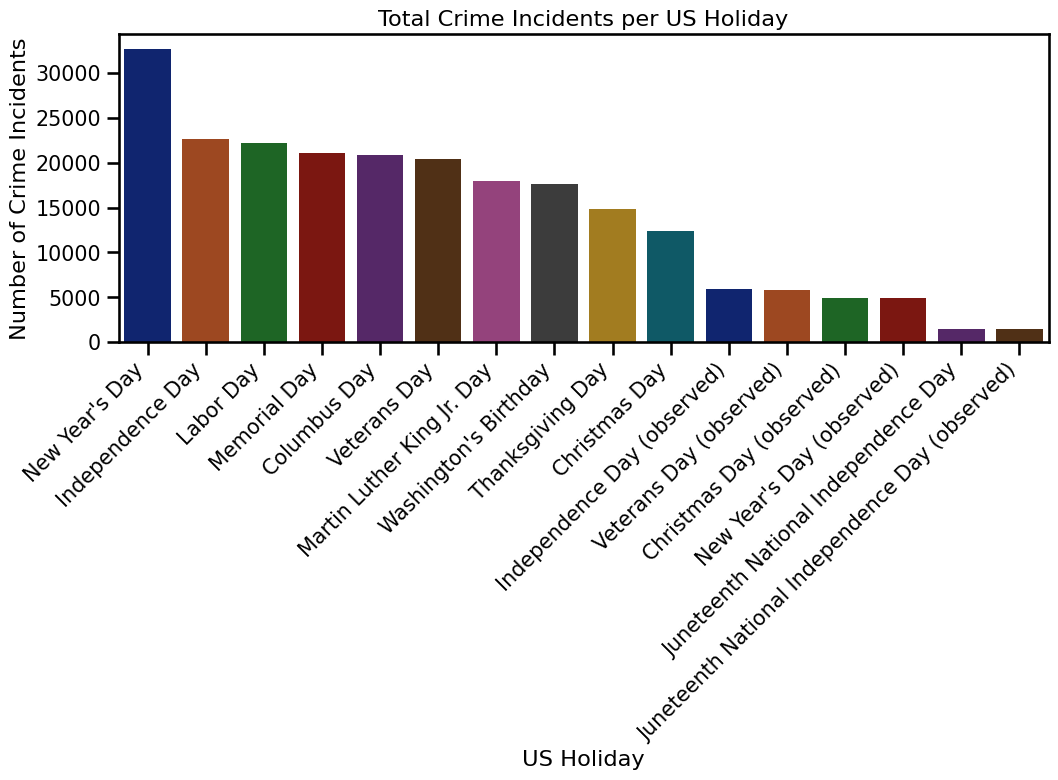

In [21]:
# Create a barplot of the holiday crime counts
ax = sns.barplot(x=holiday_crime_counts.index, y=holiday_crime_counts.values, palette='dark')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
ax.set_title('Total Crime Incidents per US Holiday')
ax.set_xlabel('US Holiday')
ax.set_ylabel('Number of Crime Incidents')

The top 3 holidays with the largest numbers of crimes are:
- 1- New Years Day
- 2- Independence day
- 3- Labor Day

### Top 3 crimes in New Years Eve

In [22]:
###Total crime
total_crime_incidents = df.groupby("Primary Type").size().head()
total_crime_incidents

Primary Type
ARSON                                  13121
ASSAULT                               501103
BATTERY                              1410889
BURGLARY                              422246
CONCEALED CARRY LICENSE VIOLATION       1019
dtype: int64

1) New Year

In [23]:
### Top three most common crimes in new years day, sorted by count
display(df.loc[df['US Holiday'] == "New Year's Day"].groupby("Primary Type").size().sort_values(ascending=False).head(3))

Primary Type
THEFT              6845
BATTERY            6043
CRIMINAL DAMAGE    3236
dtype: int64

2) Independence Day

In [24]:
### Top three most common crimes on Independence Day, sorted by count
display(df.loc[df['US Holiday'] == "Independence Day"].groupby("Primary Type").size().sort_values(ascending=False).head(3))

Primary Type
BATTERY            5805
THEFT              4074
CRIMINAL DAMAGE    3309
dtype: int64

3)  Labor Day

In [25]:
### Top three most common crimes on Labor Day, sorted by count
display(df.loc[df['US Holiday'] == "Labor Day"].groupby("Primary Type").size().sort_values(ascending=False).head(3))

Primary Type
BATTERY            4607
THEFT              4520
CRIMINAL DAMAGE    2475
dtype: int64

# Inspecting the Data Format to get General look at the total crime rate per year and the counts for Primary Type (crime counts)

## 1)check crimes count each year

### Sorting index to see the earliest and most recent timestamp.

In [26]:
df = df.sort_index()
df.index

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:47:00',
               '2022-12-31 23:47:00', '2022-12-31 23:50:00',
               '2022-12-31 23:50:00', '2022-12-31 23:55:00'],
              dtype='datetime64[ns]', name='Date', length=7713109, freq=None)

In [27]:
df.head()

ID             Primary Type                    Description  \
Date                                                                           
2001-01-01   2561460                    THEFT  FINANCIAL ID THEFT: OVER $300   
2001-01-01   9755198              SEX OFFENSE      AGG CRIMINAL SEXUAL ABUSE   
2001-01-01   3164436                    THEFT  FINANCIAL ID THEFT: OVER $300   
2001-01-01   4160307                    THEFT  FINANCIAL ID THEFT: OVER $300   
2001-01-01  12674158  CRIMINAL SEXUAL ASSAULT                 NON-AGGRAVATED   

                         Location Description  Arrest  Domestic  Beat  \
Date                                                                    
2001-01-01                               BANK   False     False  1814   
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   
2001-01-01                          RESIDENCE   False     False  1132   
2001-01-01                          RESIDENCE   False     False  1021   
2001-01-01                          RESIDENCE   False      True   421   

            District  Ward   Latitude  Longitude      US Holiday  
Date                                                              
2001-01-01      18.0  43.0  41.919153 -87.636402  New Year's Day  
2001-01-01      10.0  24.0        NaN        NaN  New Year's Day  
2001-01-01      11.0  24.0  41.874375 -87.732531  New Year's Day  
2001-01-01      10.0  24.0  41.862175 -87.711496  New Year's Day  
2001-01-01       4.0   7.0        NaN        NaN  New Year's Day

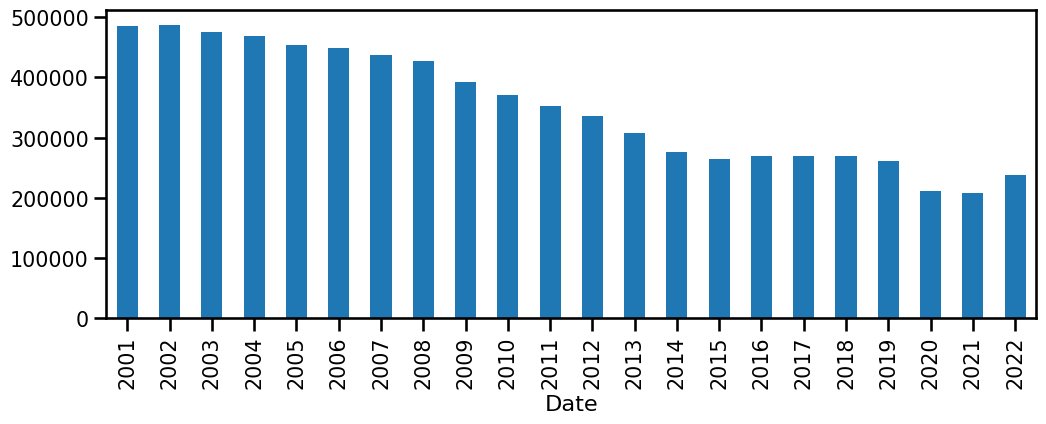

In [28]:
### Let's get a quick visualization of how many crimes we have for each year.
years = df.index.year
years.value_counts().sort_index().plot(kind='bar');

##  2)Cheking Primary types counts

In [29]:
###primery type value counts
df['Primary Type'].value_counts()

Primary Type
THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING                              7185
CRIMINAL SEXUAL ASSAULT                 6353
STALKING                                4664
INTIMIDATION                            4595
CONCEALED CARRY LICENSE VIOLATION       1019
OBSCENITY                                810
PUBLIC INDECENCY                         193
NON-CRIMINAL                             181
OTHER NARCOTIC VIOLATION                 147
HUMAN TRAFFICKING                         96
NON - CRIMINAL                            38
RITUALISM                                 24
NON-CRIMINAL (SUBJECT SPECIFIED)           9
DOMESTIC VIOLENCE                          1
Name: count, dtype: int64

<Axes: ylabel='Primary Type'>

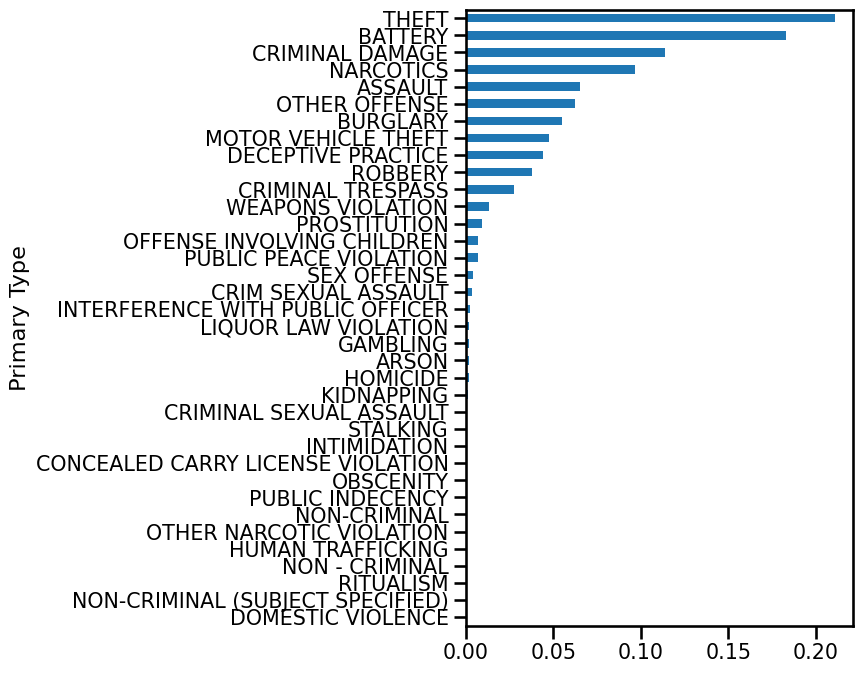

In [30]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Primary Type'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8))

In [31]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Primary Type'].value_counts().to_frame('Total # of Crimes')
crime_counts

Total # of Crimes
Primary Type                                        
THEFT                                        1626992
BATTERY                                      1410889
CRIMINAL DAMAGE                               878914
NARCOTICS                                     746155
ASSAULT                                       501103
OTHER OFFENSE                                 479174
BURGLARY                                      422246
MOTOR VEHICLE THEFT                           366586
DECEPTIVE PRACTICE                            340958
ROBBERY                                       289677
CRIMINAL TRESPASS                             212869
WEAPONS VIOLATION                             103906
PROSTITUTION                                   69750
OFFENSE INVOLVING CHILDREN                     55280
PUBLIC PEACE VIOLATION                         52086
SEX OFFENSE                                    30442
CRIM SEXUAL ASSAULT                            27584
INTERFERENCE WITH PUBLIC OFFICER               18206
LIQUOR LAW VIOLATION                           14846
GAMBLING                                       14616
ARSON                                          13121
HOMICIDE                                       12394
KIDNAPPING                                      7185
CRIMINAL SEXUAL ASSAULT                         6353
STALKING                                        4664
INTIMIDATION                                    4595
CONCEALED CARRY LICENSE VIOLATION               1019
OBSCENITY                                        810
PUBLIC INDECENCY                                 193
NON-CRIMINAL                                     181
OTHER NARCOTIC VIOLATION                         147
HUMAN TRAFFICKING                                 96
NON - CRIMINAL                                    38
RITUALISM                                         24
NON-CRIMINAL (SUBJECT SPECIFIED)                   9
DOMESTIC VIOLENCE                                  1

In [32]:
# display with an inline-barplot inside your df
crime_counts.style.bar('Total # of Crimes')

### Using Dictionaries and Looping  for **Primary type**

In [33]:
df.groupby("Primary Type").size().head()

Primary Type
ARSON                                  13121
ASSAULT                               501103
BATTERY                              1410889
BURGLARY                              422246
CONCEALED CARRY LICENSE VIOLATION       1019
dtype: int64

### One crime loop on daily basis

In [34]:
## making our dictionary
CRIMES = {}

In [35]:
## Lets test 1 crime before we create our loop
crime ='ROBBERY'
crime

'ROBBERY'

In [36]:
# I. Save a temp df of just the rows that match the crime
temp = df.loc[ df['Primary Type']==crime]
temp.head(3)

ID Primary Type            Description  \
Date                                                               
2001-01-01 00:20:00  1311046      ROBBERY  STRONGARM - NO WEAPON   
2001-01-01 00:38:40  1311667      ROBBERY  STRONGARM - NO WEAPON   
2001-01-01 01:09:29  1310522      ROBBERY         ARMED: HANDGUN   

                    Location Description  Arrest  Domestic  Beat  District  \
Date                                                                         
2001-01-01 00:20:00         CTA PLATFORM   False     False  2311      19.0   
2001-01-01 00:38:40                ALLEY   False     False  1924      19.0   
2001-01-01 01:09:29               STREET    True     False   434       4.0   

                     Ward   Latitude  Longitude      US Holiday  
Date                                                             
2001-01-01 00:20:00   NaN  41.965917 -87.657969  New Year's Day  
2001-01-01 00:38:40   NaN  41.940027 -87.653501  New Year's Day  
2001-01-01 01:09:29   NaN  41.703375 -87.560674  New Year's Day

In [37]:
# II. Resample the temp DataFrame as Daily data (crime counts)
# and keep ONLY the .size()
temp_res = temp.resample("D").size()
temp_res

Date
2001-01-01    41
2001-01-02    35
2001-01-03    51
2001-01-04    55
2001-01-05    55
              ..
2022-12-27    27
2022-12-28    28
2022-12-29    28
2022-12-30    37
2022-12-31    26
Freq: D, Length: 8035, dtype: int64

In [38]:
#III. Save the temporary DataFrame in the dictionary, #using the crime description as the key.
CRIMES[crime] = temp_res.copy()
CRIMES.keys()

dict_keys(['ROBBERY'])

In [39]:
CRIMES['ROBBERY']

Date
2001-01-01    41
2001-01-02    35
2001-01-03    51
2001-01-04    55
2001-01-05    55
              ..
2022-12-27    27
2022-12-28    28
2022-12-29    28
2022-12-30    37
2022-12-31    26
Freq: D, Length: 8035, dtype: int64

### Making the loop for all crime types on daily bases and creating crimes df

In [40]:
# 1. get list of  unique crime descriptions
crime_list = df['Primary Type'].unique()
crime_list

array(['THEFT', 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'ASSAULT',
       'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'OTHER OFFENSE', 'BATTERY',
       'BURGLARY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION',
       'CRIMINAL TRESPASS', 'ROBBERY', 'NARCOTICS',
       'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE',
       'GAMBLING', 'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION', 'ARSON',
       'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

In [41]:
# 2. Create an empty dictionary
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df.loc[ df['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts)
    # and keep ONLY the .size()
   temp_res = temp.resample("D").size()
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy()
CRIMES.keys()

dict_keys(['THEFT', 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'ASSAULT', 'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'OFFENSE INVOLVING CHILDREN', 'OTHER OFFENSE', 'BATTERY', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'ROBBERY', 'NARCOTICS', 'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE', 'GAMBLING', 'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

In [42]:
##♥5verify the values for one type. We will check values for shootings:
CRIMES['SEX OFFENSE']

Date
2001-01-01    65
2001-01-02     4
2001-01-03     5
2001-01-04     1
2001-01-05     2
              ..
2022-12-27     2
2022-12-28     0
2022-12-29     3
2022-12-30     0
2022-12-31     3
Freq: D, Length: 8035, dtype: int64

In [43]:
crimes_df = pd.DataFrame(CRIMES)
crimes_df

THEFT  SEX OFFENSE  CRIMINAL SEXUAL ASSAULT  ASSAULT  \
Date                                                               
2001-01-01    412           65                        3       70   
2001-01-02    221            4                        0       66   
2001-01-03    226            5                        0       79   
2001-01-04    243            1                        0       57   
2001-01-05    265            2                        0       68   
...           ...          ...                      ...      ...   
2022-12-27    147            2                        4       47   
2022-12-28    112            0                        4       44   
2022-12-29    137            3                        1       38   
2022-12-30    125            0                        4       51   
2022-12-31    102            3                        3       62   

            CRIM SEXUAL ASSAULT  DECEPTIVE PRACTICE  CRIMINAL DAMAGE  \
Date                                                                   
2001-01-01                 38.0                  94              233   
2001-01-02                  2.0                  78              118   
2001-01-03                  7.0                  49              136   
2001-01-04                  2.0                  42              133   
2001-01-05                  6.0                  53              142   
...                         ...                 ...              ...   
2022-12-27                  NaN                  40               64   
2022-12-28                  NaN                  38               78   
2022-12-29                  NaN                  38               95   
2022-12-30                  NaN                  43              100   
2022-12-31                  NaN                  43              128   

            OFFENSE INVOLVING CHILDREN  OTHER OFFENSE  BATTERY  ...  \
Date                                                            ...   
2001-01-01                         100            167      296  ...   
2001-01-02                           4            101      143  ...   
2001-01-03                           3             96      165  ...   
2001-01-04                           5             96      173  ...   
2001-01-05                           9             90      178  ...   
...                                ...            ...      ...  ...   
2022-12-27                           4             33       76  ...   
2022-12-28                           3             38      102  ...   
2022-12-29                           3             37       97  ...   
2022-12-30                           4             38      106  ...   
2022-12-31                           5             37      122  ...   

            RITUALISM  DOMESTIC VIOLENCE  OBSCENITY  OTHER NARCOTIC VIOLATION  \
Date                                                                            
2001-01-01        NaN                NaN        NaN                       NaN   
2001-01-02        NaN                NaN        NaN                       NaN   
2001-01-03        NaN                NaN        NaN                       NaN   
2001-01-04        NaN                NaN        NaN                       NaN   
2001-01-05        NaN                NaN        NaN                       NaN   
...               ...                ...        ...                       ...   
2022-12-27        NaN                NaN        NaN                       NaN   
2022-12-28        NaN                NaN        NaN                       NaN   
2022-12-29        NaN                NaN        NaN                       NaN   
2022-12-30        NaN                NaN        NaN                       NaN   
2022-12-31        NaN                NaN        NaN                       NaN   

            PUBLIC INDECENCY  CONCEALED CARRY LICENSE VIOLATION  NON-CRIMINAL  \
Date                                                                            
2001-01-01               NaN                      

# Re-Engineering Raw Crime Data per year / month / weak days/ day / hour

In [44]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

1) Dropping uneeded columns

In [45]:
# ## Drop extra columns not needed
# drop_cols = ['District',	'Ward',	'Latitude',	'Longitude']
# df = df.drop(columns=drop_cols)
# df.info()

2) separate out the date (without time) as its own column

In [46]:
## saving just the date (no time) as a column
df['Only_Date'] = df.index.date
# could also use .strftime + pd.to_datetime
# df['Date'] = pd.to_datetime(df.index.strftime('%Y-%m-%d'))
df.head(3)

ID Primary Type                    Description  \
Date                                                              
2001-01-01  2561460        THEFT  FINANCIAL ID THEFT: OVER $300   
2001-01-01  9755198  SEX OFFENSE      AGG CRIMINAL SEXUAL ABUSE   
2001-01-01  3164436        THEFT  FINANCIAL ID THEFT: OVER $300   

                         Location Description  Arrest  Domestic  Beat  \
Date                                                                    
2001-01-01                               BANK   False     False  1814   
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   
2001-01-01                          RESIDENCE   False     False  1132   

            District  Ward   Latitude  Longitude      US Holiday   Only_Date  
Date                                                                          
2001-01-01      18.0  43.0  41.919153 -87.636402  New Year's Day  2001-01-01  
2001-01-01      10.0  24.0        NaN        NaN  New Year's Day  2001-01-01  
2001-01-01      11.0  24.0  41.874375 -87.732531  New Year's Day  2001-01-01

## 1) Year

In [47]:
## Engineering Features using components of the date/time
df['Year']  = df.index.year

/tmp/ipython-input-247088404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year',palette='dark');


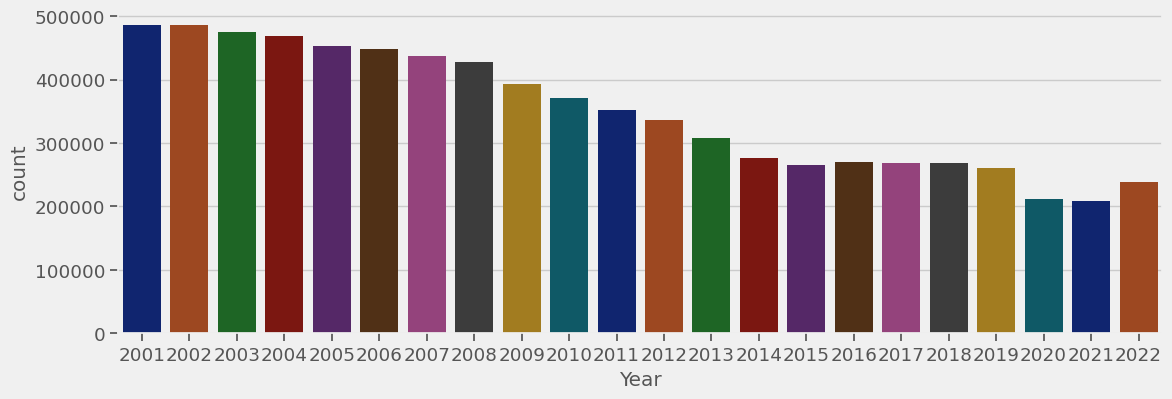

In [48]:
## visualizing again with years removed
sns.countplot(data=df, x='Year',palette='dark');

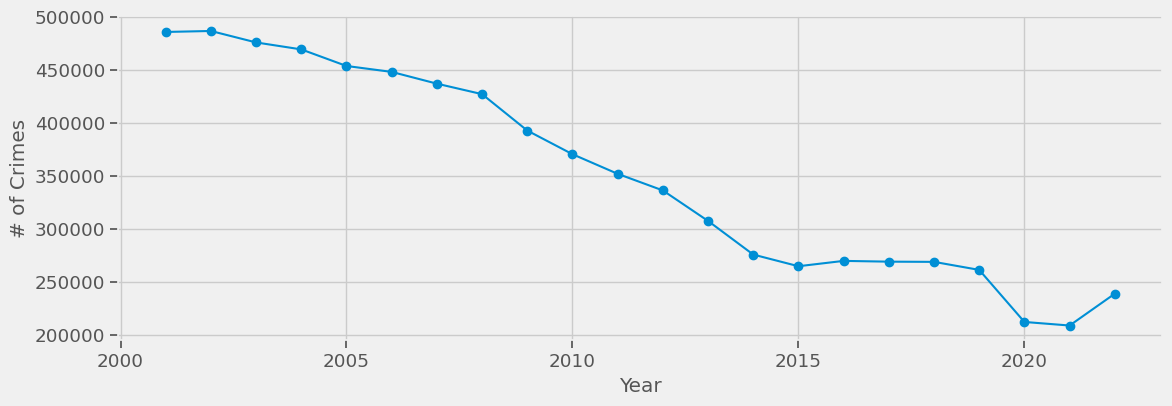

In [49]:
## save year counts
year_counts = df['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

In [50]:
crimes_by_year = df.groupby("Year")['Primary Type'].value_counts(normalize=False)
crimes_by_year

Year  Primary Type            
2001  THEFT                       99277
      BATTERY                     93461
      CRIMINAL DAMAGE             55859
      NARCOTICS                   50567
      ASSAULT                     31384
                                  ...  
2022  HUMAN TRAFFICKING              17
      GAMBLING                        9
      OTHER NARCOTIC VIOLATION        7
      NON-CRIMINAL                    5
      PUBLIC INDECENCY                5
Name: count, Length: 689, dtype: int64

In [109]:
###plot crimes by year


In [112]:
crimes_df.columns

Index(['THEFT', 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'ASSAULT',
       'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'OTHER OFFENSE', 'BATTERY', 'BURGLARY',
       'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS',
       'ROBBERY', 'NARCOTICS', 'LIQUOR LAW VIOLATION',
       'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'STALKING', 'HOMICIDE', 'GAMBLING', 'KIDNAPPING', 'PROSTITUTION',
       'INTIMIDATION', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'],
      dtype='object')

In [119]:
### Substract to get delta crmes
delta_crime_yrs = crimes_df.loc['2022-12-31'] - crimes_df.loc['2001-01-01']
delta_crime_yrs

THEFT                               -310.0
SEX OFFENSE                          -62.0
CRIMINAL SEXUAL ASSAULT                0.0
ASSAULT                               -8.0
CRIM SEXUAL ASSAULT                  -38.0
DECEPTIVE PRACTICE                   -51.0
CRIMINAL DAMAGE                     -105.0
OFFENSE INVOLVING CHILDREN           -95.0
OTHER OFFENSE                       -130.0
BATTERY                             -174.0
BURGLARY                             -45.0
MOTOR VEHICLE THEFT                   28.0
WEAPONS VIOLATION                     26.0
CRIMINAL TRESPASS                    -15.0
ROBBERY                              -15.0
NARCOTICS                            -91.0
LIQUOR LAW VIOLATION                  -2.0
PUBLIC PEACE VIOLATION                -4.0
INTERFERENCE WITH PUBLIC OFFICER      -1.0
STALKING                               0.0
HOMICIDE                               0.0
GAMBLING                              -2.0
KIDNAPPING                            -2.0
PROSTITUTION                          -5.0
INTIMIDATION                          -1.0
ARSON                                  3.0
RITUALISM                              0.0
DOMESTIC VIOLENCE                      0.0
OBSCENITY                              0.0
OTHER NARCOTIC VIOLATION               0.0
PUBLIC INDECENCY                       0.0
CONCEALED CARRY LICENSE VIOLATION      0.0
NON-CRIMINAL                           0.0
HUMAN TRAFFICKING                      0.0
NON-CRIMINAL (SUBJECT SPECIFIED)       0.0
NON - CRIMINAL                         0.0
dtype: float64

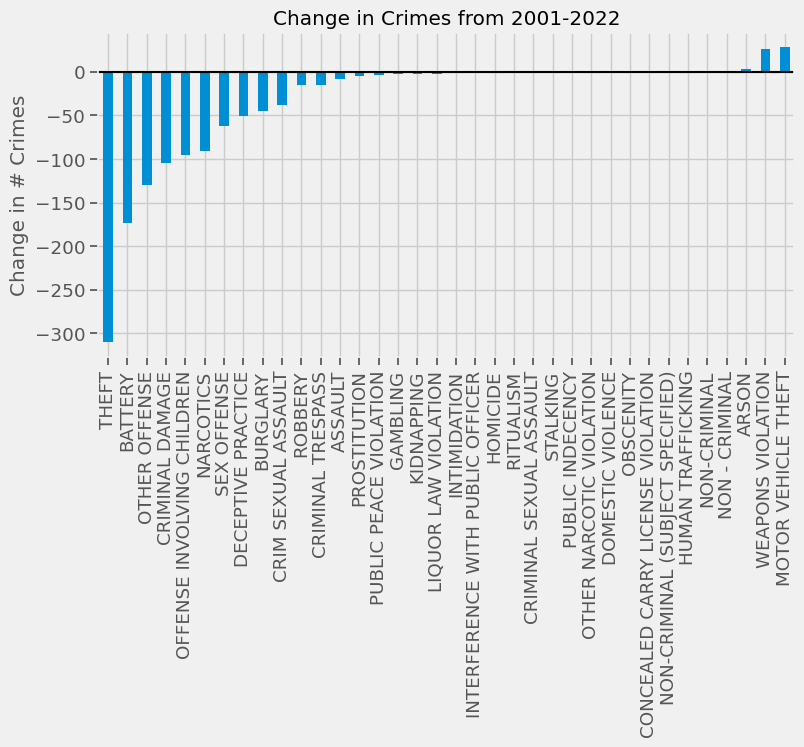

In [120]:
ax = delta_crime_yrs.sort_values().plot(kind='bar',figsize=(8,4),
                                       ylabel='Change in # Crimes',
                                       title='Change in Crimes from 2001-2022')
ax.axhline(0,color='k');


### Question Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [111]:
crimes_df.columns

Index(['THEFT', 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'ASSAULT',
       'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'OTHER OFFENSE', 'BATTERY', 'BURGLARY',
       'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS',
       'ROBBERY', 'NARCOTICS', 'LIQUOR LAW VIOLATION',
       'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'STALKING', 'HOMICIDE', 'GAMBLING', 'KIDNAPPING', 'PROSTITUTION',
       'INTIMIDATION', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'],
      dtype='object')

## 2) Month with Question What are the 3 most common crimes committed December-January?

In [52]:
## Extracting the Month
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head(3)

ID Primary Type                    Description  \
Date                                                              
2001-01-01  2561460        THEFT  FINANCIAL ID THEFT: OVER $300   
2001-01-01  9755198  SEX OFFENSE      AGG CRIMINAL SEXUAL ABUSE   
2001-01-01  3164436        THEFT  FINANCIAL ID THEFT: OVER $300   

                         Location Description  Arrest  Domestic  Beat  \
Date                                                                    
2001-01-01                               BANK   False     False  1814   
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   
2001-01-01                          RESIDENCE   False     False  1132   

            District  Ward   Latitude  Longitude      US Holiday   Only_Date  \
Date                                                                           
2001-01-01      18.0  43.0  41.919153 -87.636402  New Year's Day  2001-01-01   
2001-01-01      10.0  24.0        NaN        NaN  New Year's Day  2001-01-01   
2001-01-01      11.0  24.0  41.874375 -87.732531  New Year's Day  2001-01-01   

            Year  Month MonthName  
Date                               
2001-01-01  2001      1   January  
2001-01-01  2001      1   January  
2001-01-01  2001      1   January

create a dictionary to match the number of the month with the name. This will allow us to keep our months in order by number

In [53]:
# saving lookup for number vs name
unique_months = df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

/tmp/ipython-input-1369714036.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='MonthName',palette='dark',order=month_lookup.values());
/tmp/ipython-input-1369714036.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


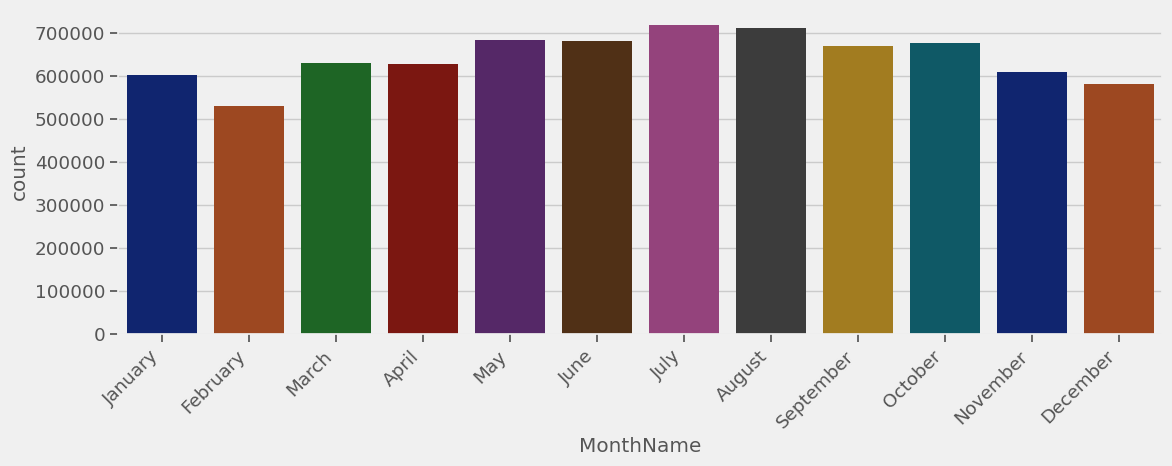

In [54]:
ax = sns.countplot(data=df, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

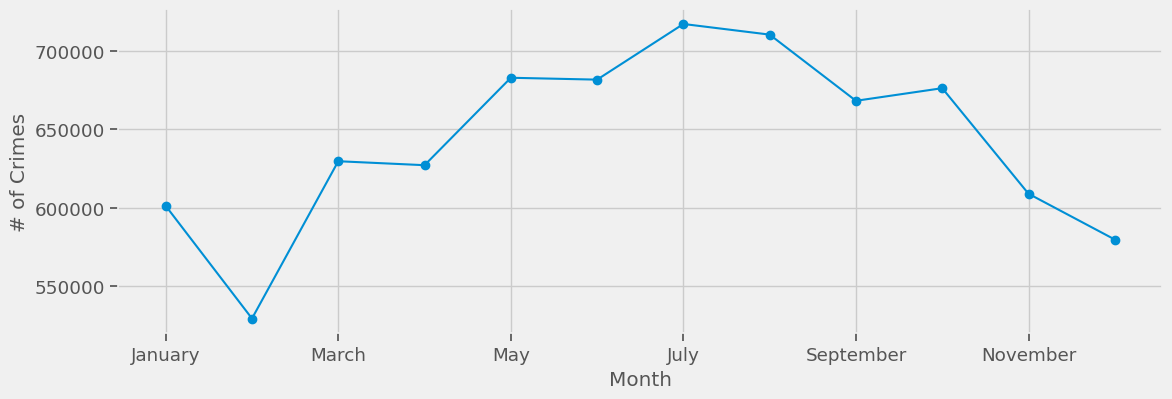

In [55]:
## save month counts
month_counts = df['MonthName'].value_counts()[month_lookup.values()]

ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

### What are the 3 most common crimes committed December-January?

In [56]:
crimes_by_month = df.groupby("Month")['Primary Type'].value_counts(normalize=False)
crimes_by_month

Month  Primary Type                    
1      THEFT                               123454
       BATTERY                             101302
       NARCOTICS                            65943
       CRIMINAL DAMAGE                      62574
       OTHER OFFENSE                        42162
                                            ...  
12     OTHER NARCOTIC VIOLATION                 8
       HUMAN TRAFFICKING                        4
       RITUALISM                                3
       NON - CRIMINAL                           1
       NON-CRIMINAL (SUBJECT SPECIFIED)         1
Name: count, Length: 415, dtype: int64

In [57]:
jan_dec_crimes = crimes_by_month.loc[1] + crimes_by_month.loc[12]
jan_dec_crimes

Primary Type
ARSON                                  1840.0
ASSAULT                               69142.0
BATTERY                              199666.0
BURGLARY                              68274.0
CONCEALED CARRY LICENSE VIOLATION       126.0
CRIM SEXUAL ASSAULT                    4426.0
CRIMINAL DAMAGE                      125704.0
CRIMINAL SEXUAL ASSAULT                1015.0
CRIMINAL TRESPASS                     34275.0
DECEPTIVE PRACTICE                    60315.0
DOMESTIC VIOLENCE                         NaN
GAMBLING                                707.0
HOMICIDE                               1696.0
HUMAN TRAFFICKING                        19.0
INTERFERENCE WITH PUBLIC OFFICER       2512.0
INTIMIDATION                            682.0
KIDNAPPING                             1179.0
LIQUOR LAW VIOLATION                   1902.0
MOTOR VEHICLE THEFT                   62251.0
NARCOTICS                            119870.0
NON - CRIMINAL                            3.0
NON-CRIMINAL                             25.0
NON-CRIMINAL (SUBJECT SPECIFIED)          2.0
OBSCENITY                               137.0
OFFENSE INVOLVING CHILDREN            10550.0
OTHER NARCOTIC VIOLATION                 16.0
OTHER OFFENSE                         77272.0
PROSTITUTION                          10735.0
PUBLIC INDECENCY                         21.0
PUBLIC PEACE VIOLATION                 6687.0
RITUALISM                                 6.0
ROBBERY                               49161.0
SEX OFFENSE                            4644.0
STALKING                                710.0
THEFT                                250098.0
WEAPONS VIOLATION                     15335.0
Name: count, dtype: float64

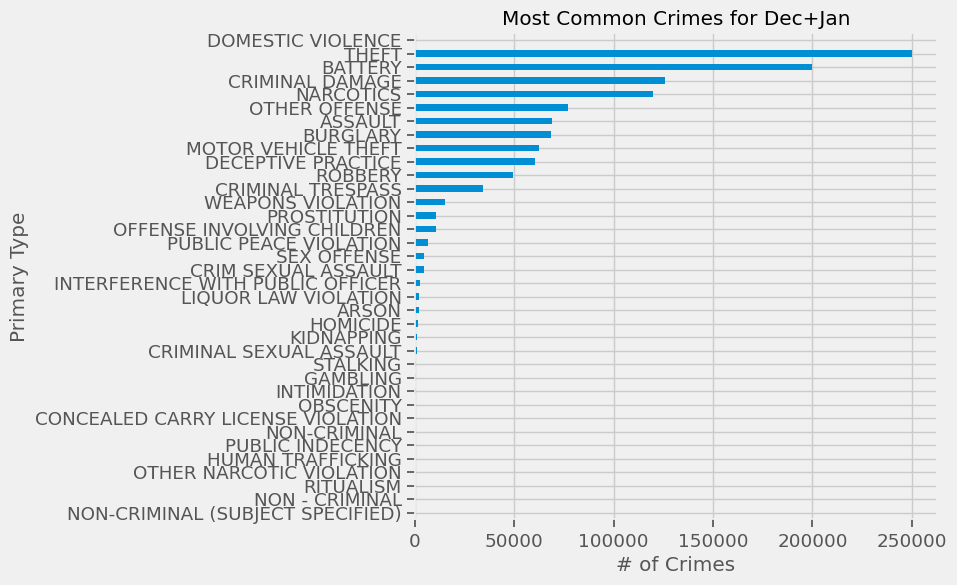

In [58]:
ax = jan_dec_crimes.sort_values().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes for Dec+Jan',xlabel='# of Crimes');

## 3) Day of the week

In [59]:
## adding day of week as both number & name
df['DayOfWeek'] = df.index.day_name()
df['DayNum'] = df.index.day_of_week
df.head(3)

ID Primary Type                    Description  \
Date                                                              
2001-01-01  2561460        THEFT  FINANCIAL ID THEFT: OVER $300   
2001-01-01  9755198  SEX OFFENSE      AGG CRIMINAL SEXUAL ABUSE   
2001-01-01  3164436        THEFT  FINANCIAL ID THEFT: OVER $300   

                         Location Description  Arrest  Domestic  Beat  \
Date                                                                    
2001-01-01                               BANK   False     False  1814   
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   
2001-01-01                          RESIDENCE   False     False  1132   

            District  Ward   Latitude  Longitude      US Holiday   Only_Date  \
Date                                                                           
2001-01-01      18.0  43.0  41.919153 -87.636402  New Year's Day  2001-01-01   
2001-01-01      10.0  24.0        NaN        NaN  New Year's Day  2001-01-01   
2001-01-01      11.0  24.0  41.874375 -87.732531  New Year's Day  2001-01-01   

            Year  Month MonthName DayOfWeek  DayNum  
Date                                                 
2001-01-01  2001      1   January    Monday       0  
2001-01-01  2001      1   January    Monday       0  
2001-01-01  2001      1   January    Monday       0

In [60]:
# saving lookup for number vs named days
unique_days = df.drop_duplicates(subset=['DayNum']).sort_values('DayNum')
day_lookup =dict(zip(unique_days['DayNum'],unique_days['DayOfWeek']))
day_lookup

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

/tmp/ipython-input-4279422870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='DayNum',palette='dark')
/tmp/ipython-input-4279422870.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([v for k,v in day_lookup.items()]);


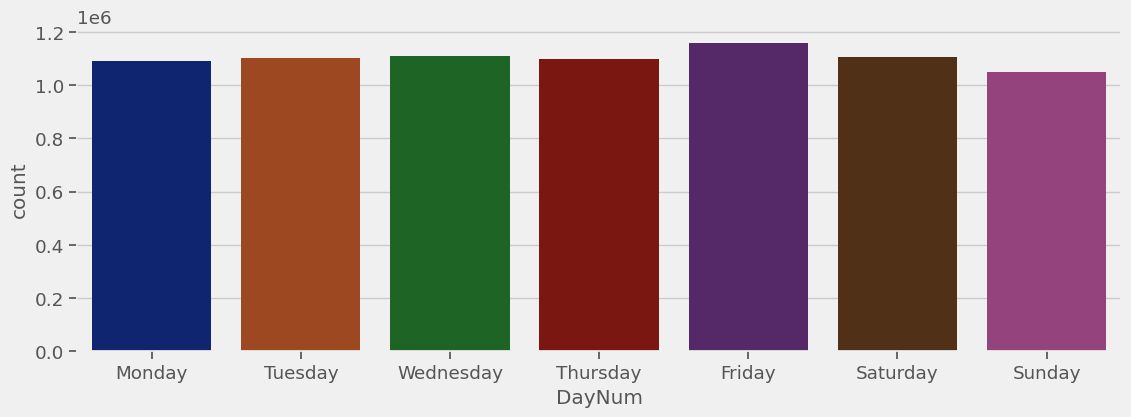

In [61]:
## plot DayNum, but use names from day_lookup for ticks
ax = sns.countplot(data=df, x='DayNum',palette='dark')
ax.set_xticklabels([v for k,v in day_lookup.items()]);

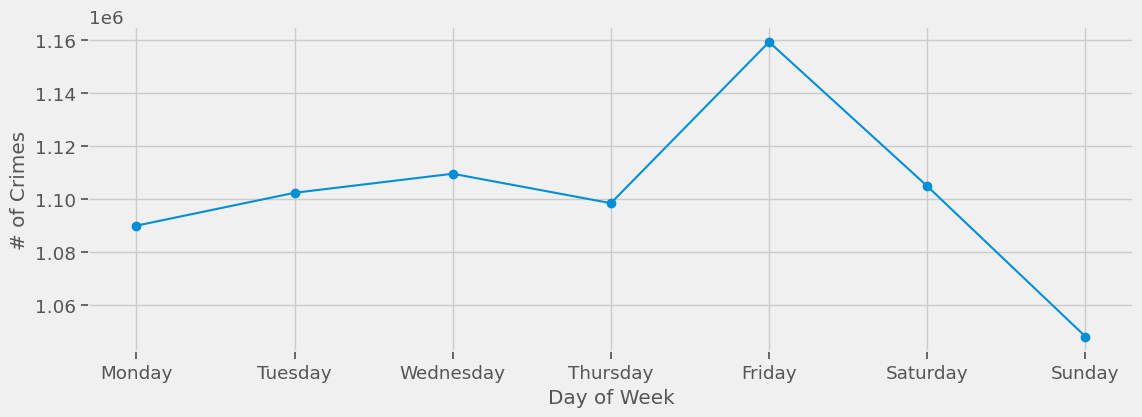

In [62]:
## save day counts
day_counts = df['DayNum'].value_counts().sort_index()
## now that its in order, rename using day_lookup
day_counts = day_counts.rename(day_lookup)
ax = day_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Day of Week')

## 4) Weekends

/tmp/ipython-input-474510420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weekend',palette='dark');


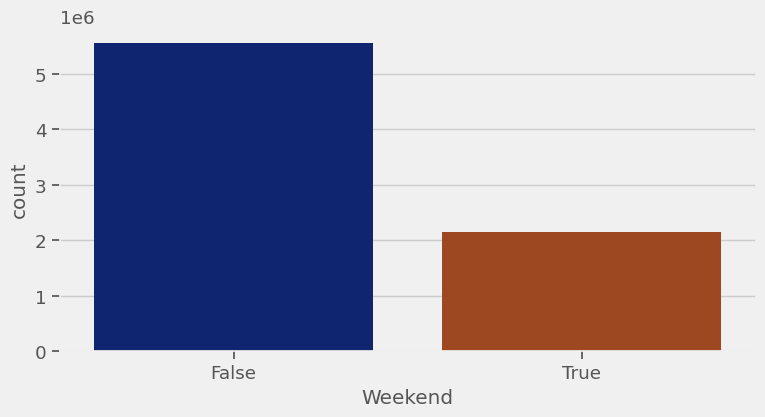

In [63]:
df['Weekend'] = df['DayOfWeek'].isin(['Saturday','Sunday'])
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Weekend',palette='dark');

In [64]:
## calculating value counts and then dividing week days by 5 and weekend by 2
weekend_counts = df["Weekend"].value_counts()
weekend_counts.loc[False] /= 5
weekend_counts.loc[True] /= 2
weekend_counts

/tmp/ipython-input-484230828.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1111999.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weekend_counts.loc[False] /= 5


Weekend
False    1111999.4
True     1076556.0
Name: count, dtype: float64

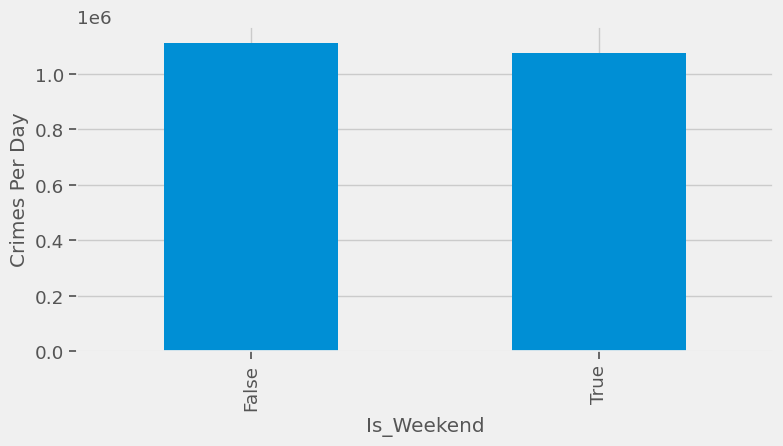

In [65]:
ax = weekend_counts.plot(kind='bar',figsize=(8,4))
ax.set(ylabel='Crimes Per Day', xlabel='Is_Weekend');


## 5) By hour with with questions

/tmp/ipython-input-3057556165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HourOfDay',palette='dark');


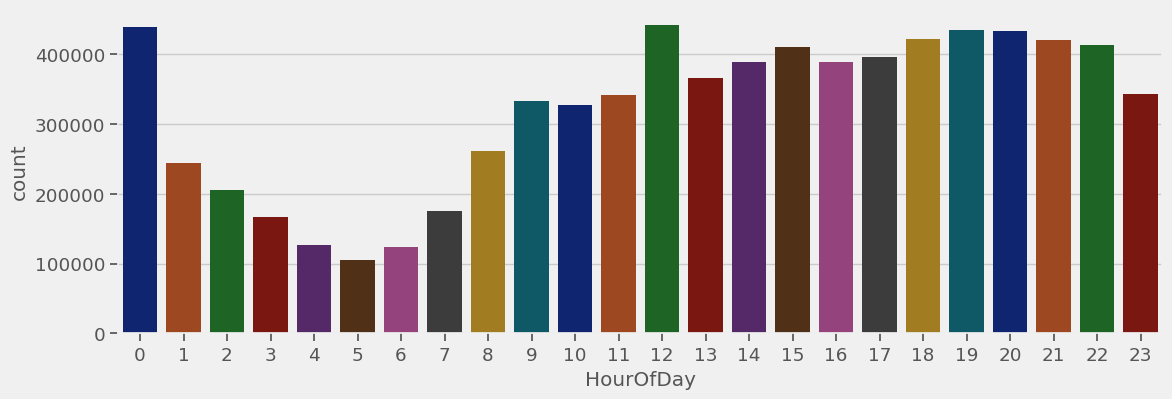

In [66]:
# adding hour of the day (12am=0)
df['HourOfDay'] = df.index.hour
sns.countplot(data=df, x='HourOfDay',palette='dark');

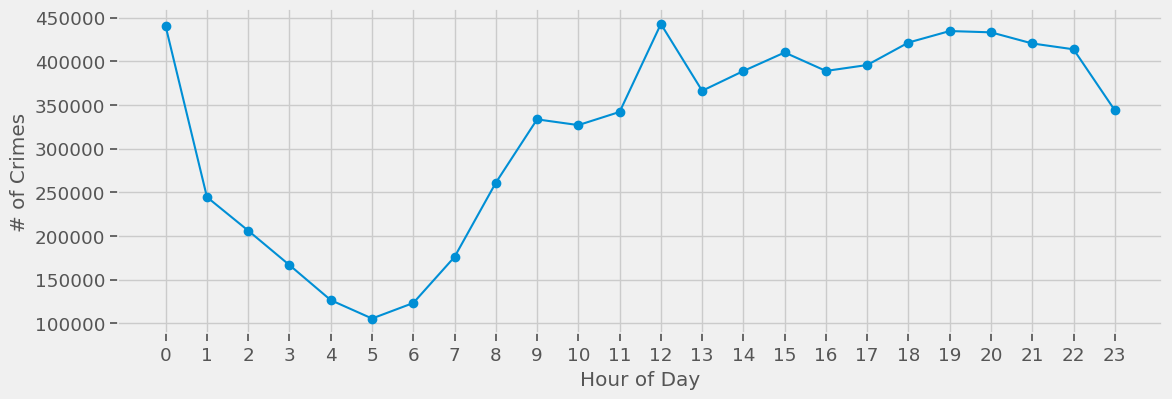

In [67]:
## save hour counts
hour_counts = df['HourOfDay'].value_counts().sort_index()

ax = hour_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Hour of Day',xticks=hour_counts.index);

### Q1) What is the likelihood of each crime across hours of the day?


In [68]:
## Get # of crimes by Hour with percentge to get the likeliihood
crimes_by_hour = df.groupby('Primary Type')['HourOfDay'].value_counts(normalize=True).sort_index()
crimes_by_hour

Primary Type       HourOfDay
ARSON              0            0.081015
                   1            0.081168
                   2            0.080634
                   3            0.074994
                   4            0.067373
                                  ...   
WEAPONS VIOLATION  19           0.072315
                   20           0.078792
                   21           0.083768
                   22           0.083248
                   23           0.076377
Name: proportion, Length: 800, dtype: float64

In [69]:
## convert to dataframe and reset_index()
plot_df = crimes_by_hour.to_frame('# of Crimes').reset_index()
plot_df

Primary Type  HourOfDay  # of Crimes
0                ARSON          0     0.081015
1                ARSON          1     0.081168
2                ARSON          2     0.080634
3                ARSON          3     0.074994
4                ARSON          4     0.067373
..                 ...        ...          ...
795  WEAPONS VIOLATION         19     0.072315
796  WEAPONS VIOLATION         20     0.078792
797  WEAPONS VIOLATION         21     0.083768
798  WEAPONS VIOLATION         22     0.083248
799  WEAPONS VIOLATION         23     0.076377

[800 rows x 3 columns]

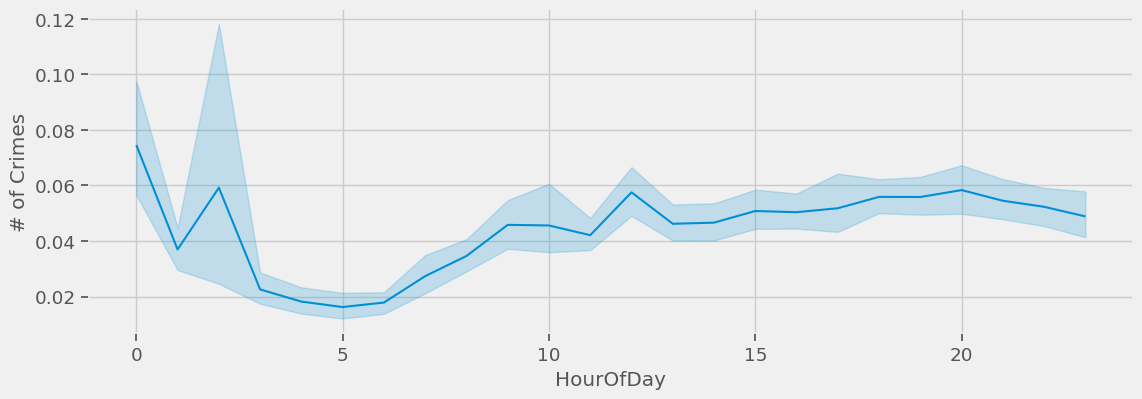

In [70]:
ax = sns.lineplot(data=plot_df, x='HourOfDay',y='# of Crimes')

the error band is very wide and indicates there is likely a lot of variability between crimes.

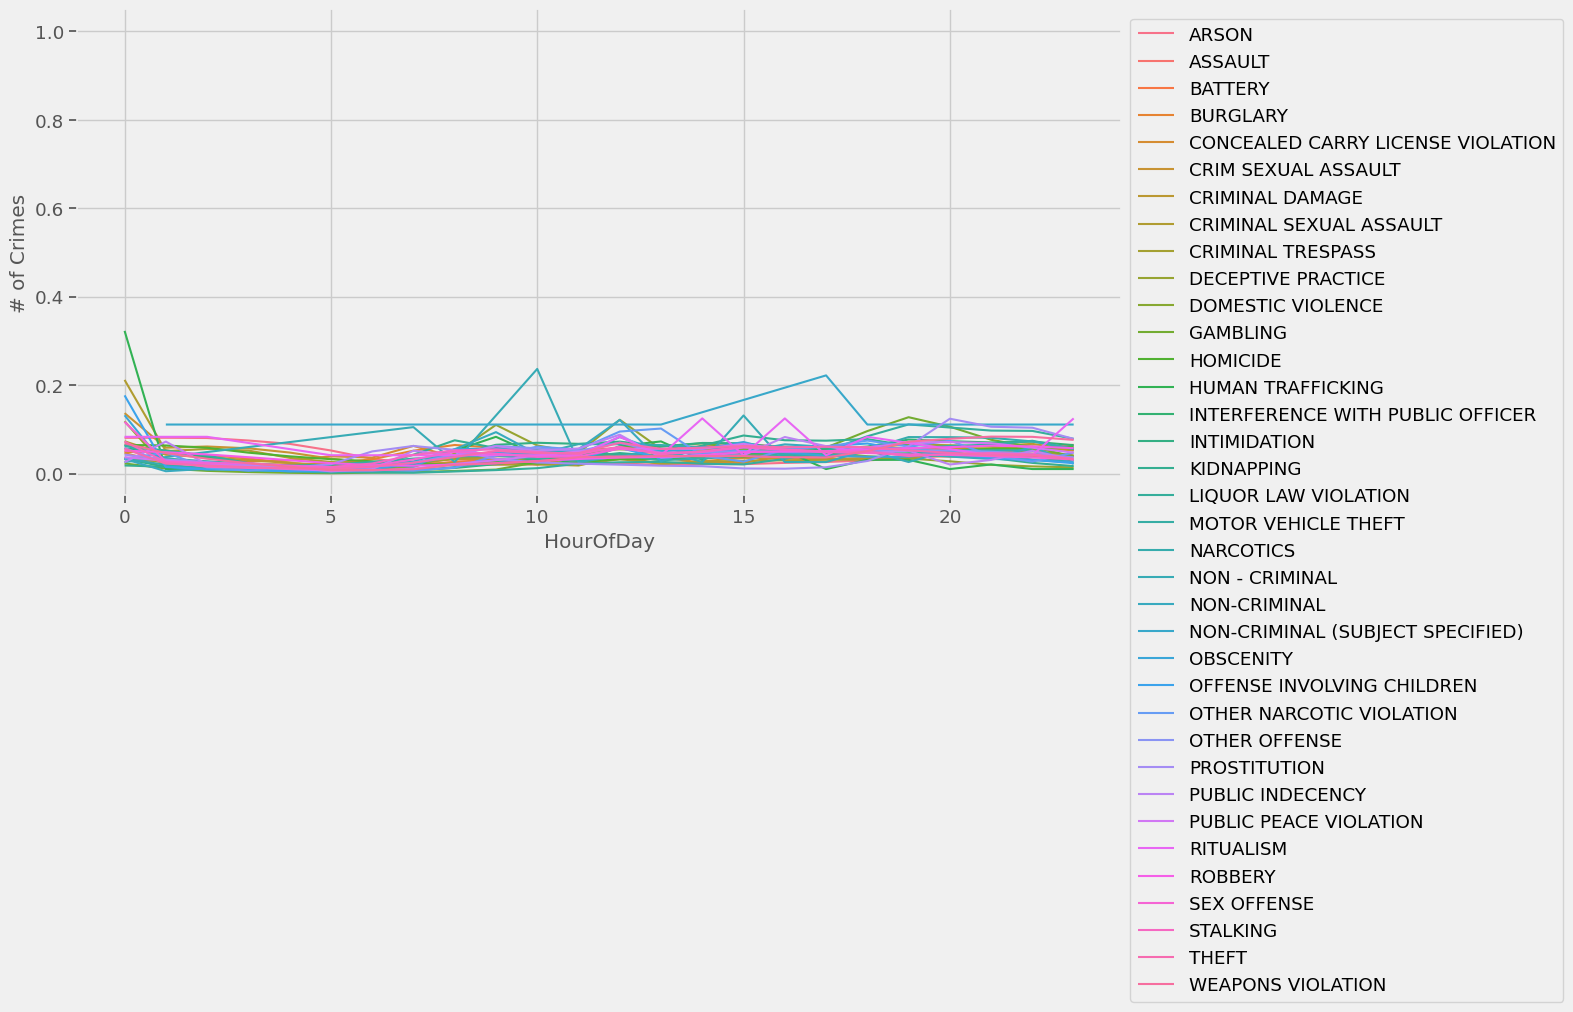

In [71]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=plot_df, x='HourOfDay',y='# of Crimes',markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);

 It is very difficult to compare the pattern for all the crimes in one plot

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


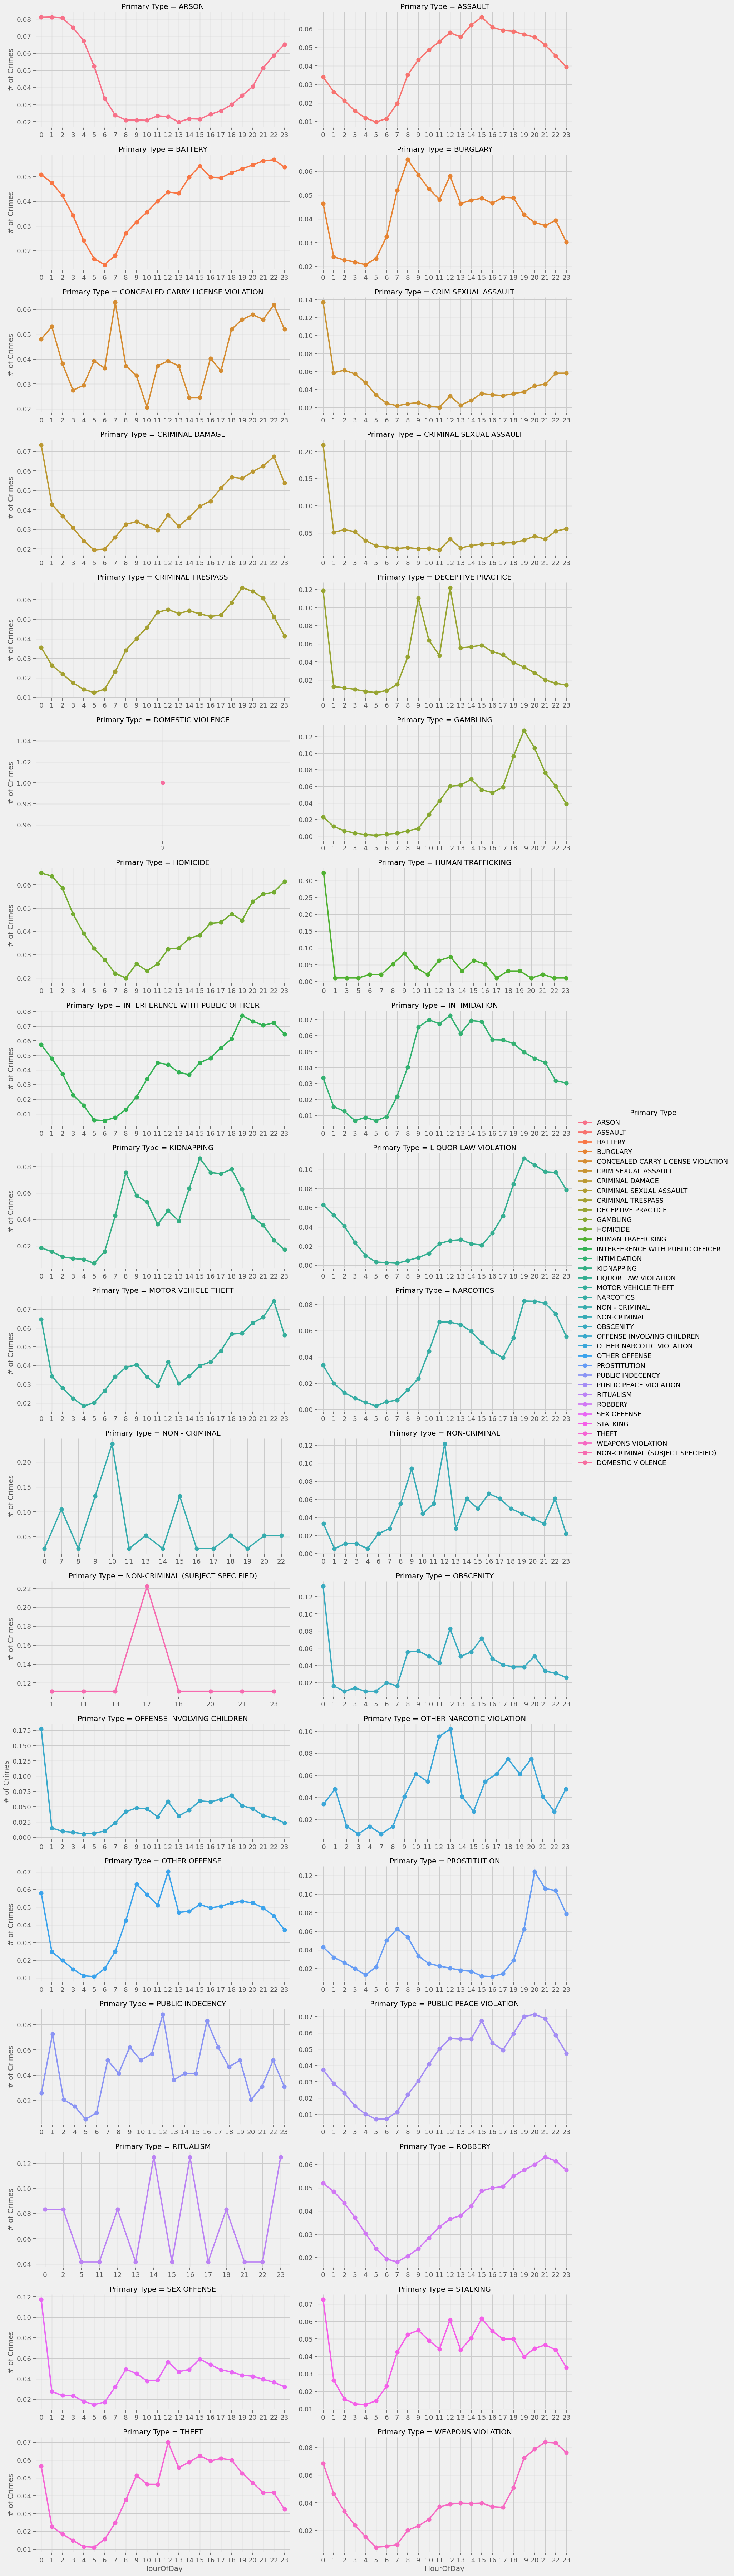

In [72]:
g = sns.catplot(data=plot_df, x='HourOfDay', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

### Q 2) For each crime, indicate when the crime is most likely to occur??? and when it is least likely to occur?????

In [73]:
## Getting all of the crimes from the first level of the index
crime_list = crimes_by_hour.index.levels[0]
crime_list

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

In [74]:
##selecting a test crime and slicing the result
crime='HOMICIDE'
crimes_by_hour.loc[crime]

HourOfDay
0     0.065031
1     0.063741
2     0.058577
3     0.047523
4     0.039213
5     0.032758
6     0.027836
7     0.022027
8     0.020090
9     0.026142
10    0.023156
11    0.026142
12    0.032516
13    0.032919
14    0.037034
15    0.038486
16    0.043489
17    0.043892
18    0.047523
19    0.044780
20    0.052848
21    0.055995
22    0.056882
23    0.061401
Name: proportion, dtype: float64

In [75]:
##  Getting indices for min and max
crimes_by_hour.loc[crime].agg(['idxmin','idxmax'])

idxmin    8
idxmax    0
Name: proportion, dtype: int32

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


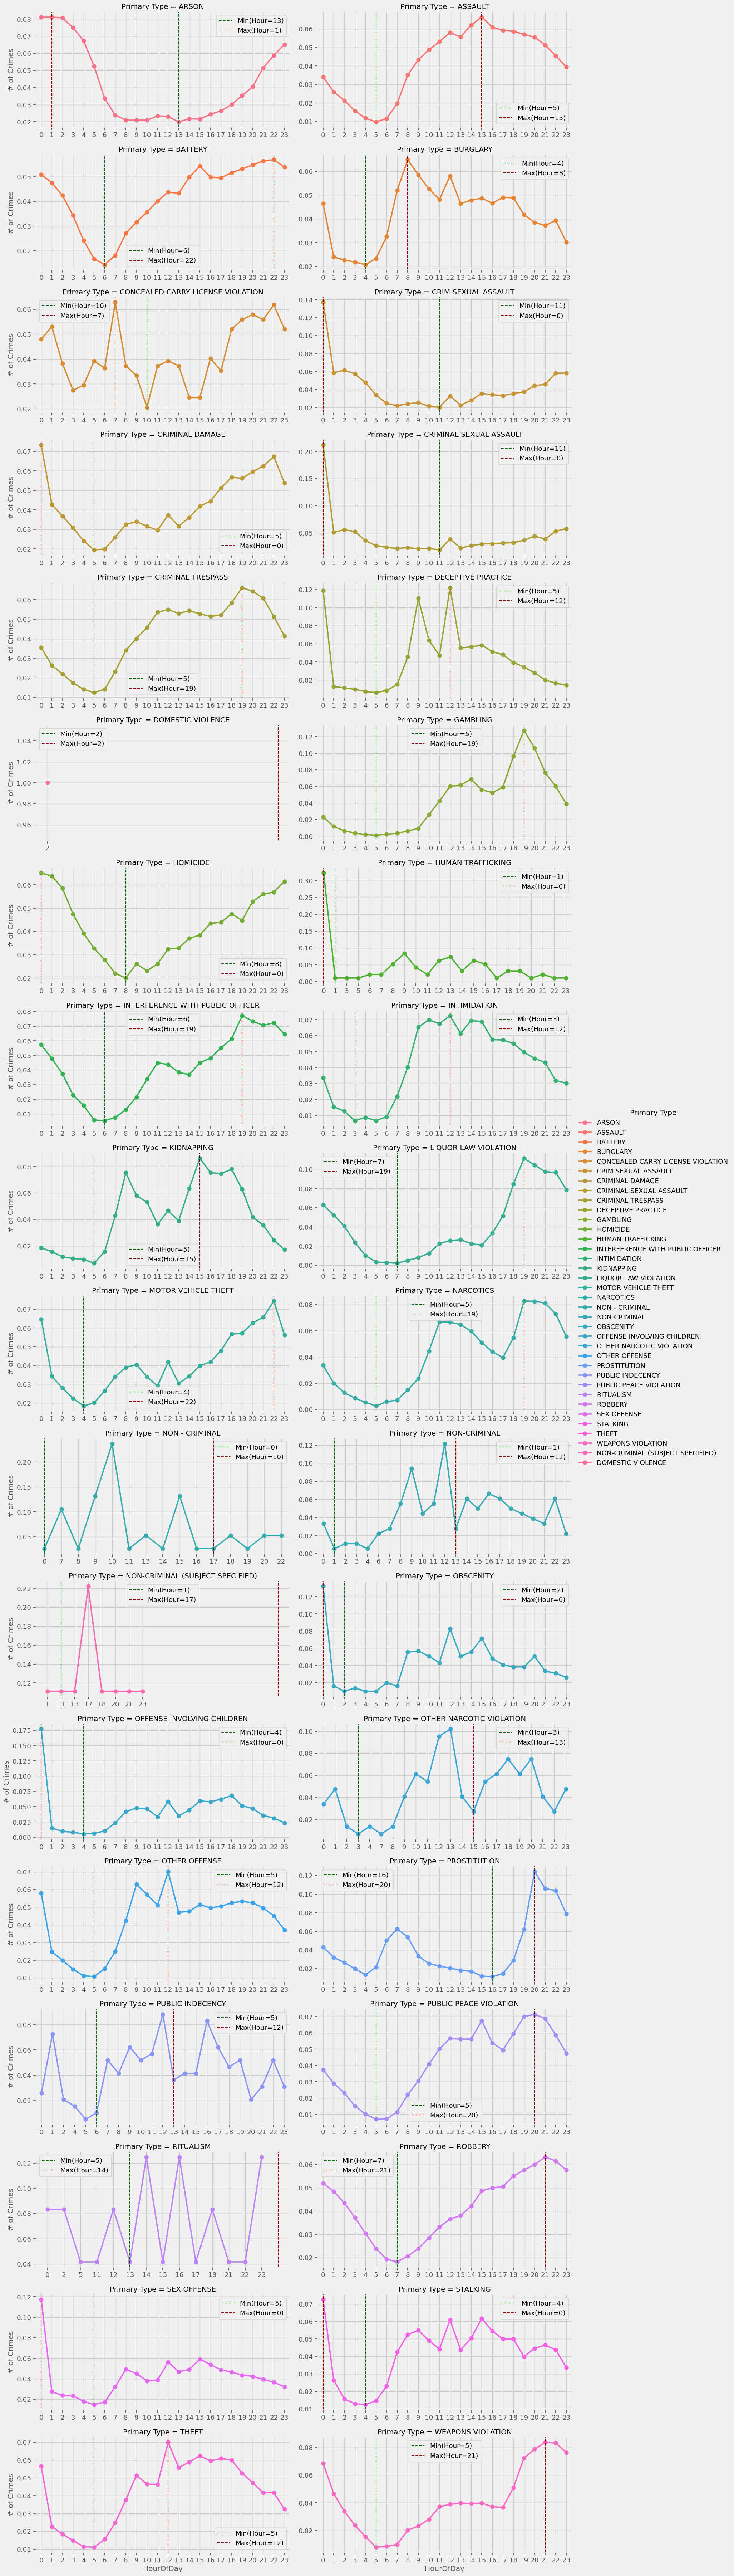

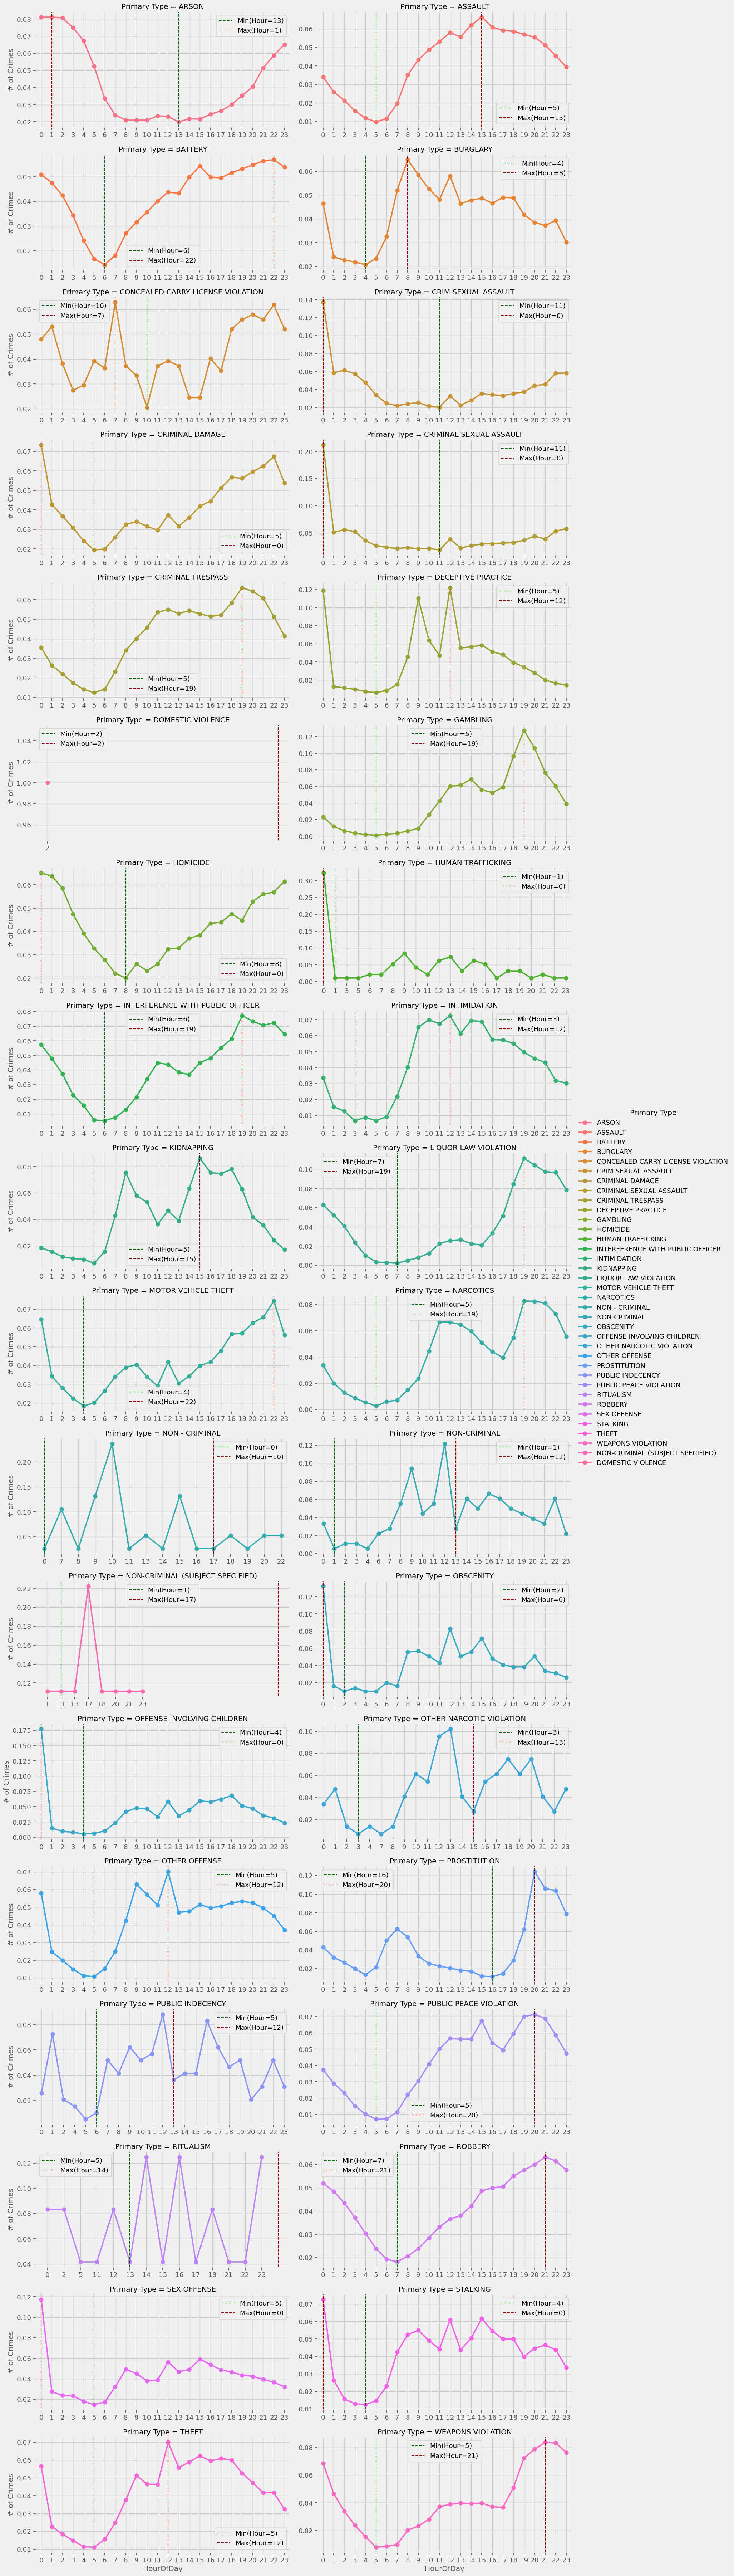

In [76]:
g = sns.catplot(data=plot_df, x='HourOfDay', y='# of Crimes',
                hue='Primary Type', col='Primary Type',col_wrap=2,
            aspect=2, height=4,
           kind='point',sharey=False,sharex=False);
## loop throught the axes dict
for col, ax in g.axes_dict.items():

    ## Extract the idx min and idxmax from the val counts
    min_, max_ = crimes_by_hour.loc[col].agg(['idxmin','idxmax'])

    ## add vlines for both and SAVE THE LINE and a label to use in legend
    ln1 = ax.axvline(min_, color='darkgreen',ls='--')
    lab1 = f'Min(Hour={min_})'

    ln2 = ax.axvline(max_,color='darkred',ls='--')
    lab2 = f'Max(Hour={max_})'

    ## manually add legend using list of ln1 and ln2 and a list of labels
    ax.legend( [ln1,ln2], [lab1,lab2] )
    ## add x grid
    ax.grid(axis='x')

g.fig

# (seasonality)




## Total crimes seasonilty on weekly bases from year 2017 to year 2022

1) Making use of crimes df i created above under section loop Primary Type

In [77]:
crimes_df

THEFT  SEX OFFENSE  CRIMINAL SEXUAL ASSAULT  ASSAULT  \
Date                                                               
2001-01-01    412           65                        3       70   
2001-01-02    221            4                        0       66   
2001-01-03    226            5                        0       79   
2001-01-04    243            1                        0       57   
2001-01-05    265            2                        0       68   
...           ...          ...                      ...      ...   
2022-12-27    147            2                        4       47   
2022-12-28    112            0                        4       44   
2022-12-29    137            3                        1       38   
2022-12-30    125            0                        4       51   
2022-12-31    102            3                        3       62   

            CRIM SEXUAL ASSAULT  DECEPTIVE PRACTICE  CRIMINAL DAMAGE  \
Date                                                                   
2001-01-01                 38.0                  94              233   
2001-01-02                  2.0                  78              118   
2001-01-03                  7.0                  49              136   
2001-01-04                  2.0                  42              133   
2001-01-05                  6.0                  53              142   
...                         ...                 ...              ...   
2022-12-27                  NaN                  40               64   
2022-12-28                  NaN                  38               78   
2022-12-29                  NaN                  38               95   
2022-12-30                  NaN                  43              100   
2022-12-31                  NaN                  43              128   

            OFFENSE INVOLVING CHILDREN  OTHER OFFENSE  BATTERY  BURGLARY  \
Date                                                                       
2001-01-01                         100            167      296        66   
2001-01-02                           4            101      143        68   
2001-01-03                           3             96      165        57   
2001-01-04                           5             96      173        55   
2001-01-05                           9             90      178        55   
...                                ...            ...      ...       ...   
2022-12-27                           4             33       76        17   
2022-12-28                           3             38      102        23   
2022-12-29                           3             37       97        29   
2022-12-30                           4             38      106        18   
2022-12-31                           5             37      122        21   

            MOTOR VEHICLE THEFT  WEAPONS VIOLATION  CRIMINAL TRESPASS  \
Date                                                                    
2001-01-01                   60                 32                 29   
2001-01-02                   65                  9                 35   
2001-01-03                   72                  7                 35   
2001-01-04                   87                  9                 29   
2001-01-05                   86                  6                 29   
...                         ...                ...                ...   
2022-12-27                   77                 12                 20   
2022-12-28                  103                 17                 12   
2022-12-29                   95                 11                 12   
2022-12-30                   95                 23                 11   
2022-12-31                   88                 58                 14   

            ROBBERY  NARCOTICS  LIQUOR LAW VIOLATION  PUBLIC PEACE VIOLATION  \
Date                                                                           
2001-01-01       41         97                     3                       5   
2001-01-02 

In [78]:
crimes_df.isna().sum()

THEFT                                   0
SEX OFFENSE                             0
CRIMINAL SEXUAL ASSAULT                 0
ASSAULT                                 0
CRIM SEXUAL ASSAULT                  1044
DECEPTIVE PRACTICE                      0
CRIMINAL DAMAGE                         0
OFFENSE INVOLVING CHILDREN              0
OTHER OFFENSE                           0
BATTERY                                 0
BURGLARY                                0
MOTOR VEHICLE THEFT                     0
WEAPONS VIOLATION                       0
CRIMINAL TRESPASS                       0
ROBBERY                                 0
NARCOTICS                               0
LIQUOR LAW VIOLATION                    0
PUBLIC PEACE VIOLATION                  0
INTERFERENCE WITH PUBLIC OFFICER        1
STALKING                                0
HOMICIDE                                0
GAMBLING                              128
KIDNAPPING                              1
PROSTITUTION                            9
INTIMIDATION                            1
ARSON                                   2
RITUALISM                             780
DOMESTIC VIOLENCE                    8034
OBSCENITY                              15
OTHER NARCOTIC VIOLATION               28
PUBLIC INDECENCY                      109
CONCEALED CARRY LICENSE VIOLATION     128
NON-CRIMINAL                          820
HUMAN TRAFFICKING                    3618
NON-CRIMINAL (SUBJECT SPECIFIED)     5877
NON - CRIMINAL                       7136
dtype: int64

Filling the null values

In [79]:
## fill null values with 0
crimes_df = crimes_df.fillna(0)
crimes_df

THEFT  SEX OFFENSE  CRIMINAL SEXUAL ASSAULT  ASSAULT  \
Date                                                               
2001-01-01    412           65                        3       70   
2001-01-02    221            4                        0       66   
2001-01-03    226            5                        0       79   
2001-01-04    243            1                        0       57   
2001-01-05    265            2                        0       68   
...           ...          ...                      ...      ...   
2022-12-27    147            2                        4       47   
2022-12-28    112            0                        4       44   
2022-12-29    137            3                        1       38   
2022-12-30    125            0                        4       51   
2022-12-31    102            3                        3       62   

            CRIM SEXUAL ASSAULT  DECEPTIVE PRACTICE  CRIMINAL DAMAGE  \
Date                                                                   
2001-01-01                 38.0                  94              233   
2001-01-02                  2.0                  78              118   
2001-01-03                  7.0                  49              136   
2001-01-04                  2.0                  42              133   
2001-01-05                  6.0                  53              142   
...                         ...                 ...              ...   
2022-12-27                  0.0                  40               64   
2022-12-28                  0.0                  38               78   
2022-12-29                  0.0                  38               95   
2022-12-30                  0.0                  43              100   
2022-12-31                  0.0                  43              128   

            OFFENSE INVOLVING CHILDREN  OTHER OFFENSE  BATTERY  BURGLARY  \
Date                                                                       
2001-01-01                         100            167      296        66   
2001-01-02                           4            101      143        68   
2001-01-03                           3             96      165        57   
2001-01-04                           5             96      173        55   
2001-01-05                           9             90      178        55   
...                                ...            ...      ...       ...   
2022-12-27                           4             33       76        17   
2022-12-28                           3             38      102        23   
2022-12-29                           3             37       97        29   
2022-12-30                           4             38      106        18   
2022-12-31                           5             37      122        21   

            MOTOR VEHICLE THEFT  WEAPONS VIOLATION  CRIMINAL TRESPASS  \
Date                                                                    
2001-01-01                   60                 32                 29   
2001-01-02                   65                  9                 35   
2001-01-03                   72                  7                 35   
2001-01-04                   87                  9                 29   
2001-01-05                   86                  6                 29   
...                         ...                ...                ...   
2022-12-27                   77                 12                 20   
2022-12-28                  103                 17                 12   
2022-12-29                   95                 11                 12   
2022-12-30                   95                 23                 11   
2022-12-31                   88                 58                 14   

            ROBBERY  NARCOTICS  LIQUOR LAW VIOLATION  PUBLIC PEACE VIOLATION  \
Date                                                                           
2001-01-01       41         97                     3                       5   
2001-01-02 

2) Checking seasonality on weekly basis from year 2017 to year 2022 and smoothing it with **rolling 4 weeks**

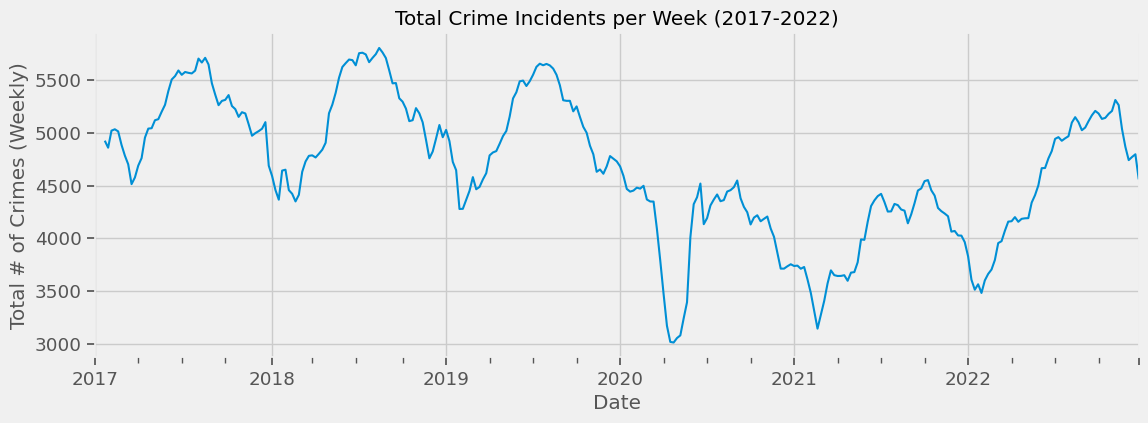

In [80]:
# Calculate the total number of crimes per day by summing across all crime types
total_crimes_daily = crimes_df.sum(axis=1)

# Resample the daily total to a weekly frequency and sum the crimes for each week
total_crimes_weekly = total_crimes_daily.resample('W').sum()

# Filter the weekly total crimes for the years 2017 to 2022
total_crimes_weekly_filtered = total_crimes_weekly.loc['2017':'2022']

# Plot the rolling 4-week mean of weekly total crimes to observe seasonality
ax = total_crimes_weekly_filtered.rolling(4).mean().plot(grid=True, ylabel='Total # of Crimes (Weekly)', xlabel='Date')
ax.set_title('Total Crime Incidents per Week (2017-2022)');

3) Analysizing seasonality with decompose

In [81]:
# import the statsmodels time series analysis api module
import statsmodels.tsa.api as tsa
tsa

<module 'statsmodels.tsa.api' from '/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/api.py'>

In [82]:
decomp = tsa.seasonal_decompose(total_crimes_weekly_filtered, model='additive')
decomp

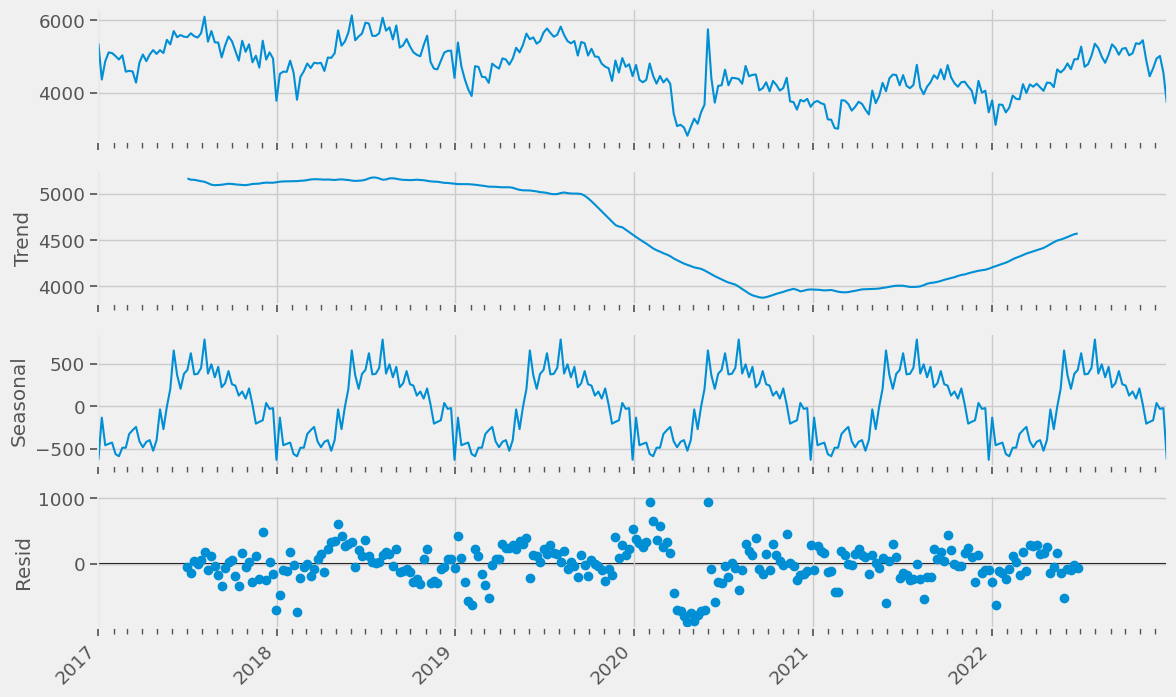

In [83]:
# import the statsmodels time series analysis api module
import statsmodels.tsa.api as tsa
import matplotlib.dates as mdates # Import mdates
import matplotlib.ticker as mticks # Import mticks

ts = tsa.seasonal_decompose(total_crimes_weekly_filtered, model='additive')
fig=ts.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.tight_layout()

# Add year ticks with labels and month ticks without labels to the x-axis
ax = fig.get_axes()
for axis in ax:
    # Set major ticks to years and format as year
    axis.xaxis.set_major_locator(mdates.YearLocator())
    axis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Set minor ticks to months and use NullFormatter to hide labels
    axis.xaxis.set_minor_locator(mdates.MonthLocator())
    axis.xaxis.set_minor_formatter(mticks.NullFormatter())

# Rotate x-axis labels for better readability
fig.autofmt_xdate(rotation=45)

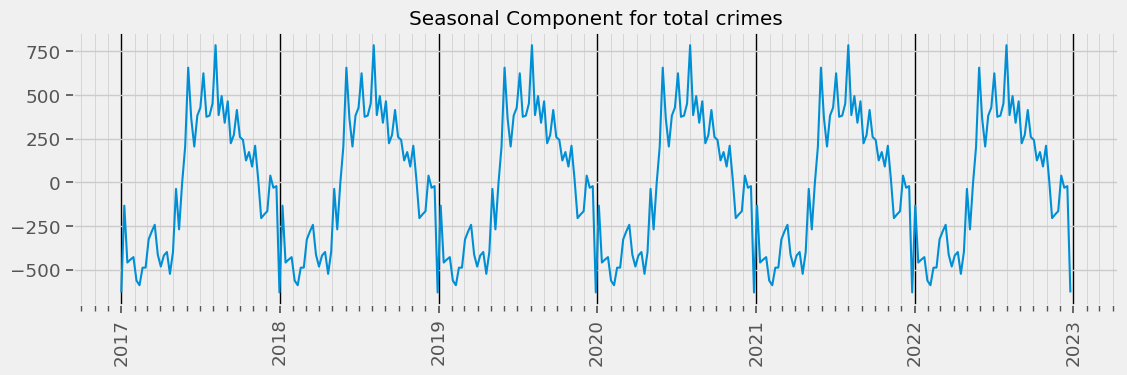

In [84]:
seasonal = ts.seasonal
minor_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
ax.plot(seasonal)
ax.set(title=f'Seasonal Component for total crimes');
ax.xaxis.set_minor_locator(minor_loc)
ax.grid(which='major', axis='x',lw=1, color='k')
ax.grid(which='minor',axis='x',lw=0.5)
fig.autofmt_xdate(rotation=90, ha='center')

4) The magnitude of the cycle

In [85]:
###how long is the cycle
seasonal.max()
seasonal.min()
magnitude = seasonal.max() - seasonal.min()
magnitude

1416.1173076923076

The is a seasonal fluctuation of ~ 1416 crimes per week

5) Duration of a Season

In [86]:
###duration of the season
seasonal.idxmax()

Timestamp('2017-08-06 00:00:00')

In [87]:
seasonal.idxmin()

Timestamp('2017-01-01 00:00:00')

In [88]:
delta = seasonal.idxmax() - seasonal.idxmin()
delta

Timedelta('217 days 00:00:00')

The season is 217 days

6) Calculating the full periods

In [89]:
###duration of the season
seasonal.idxmax()
seasonal.idxmin()

def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for Total Crimes');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax

from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())
peak_dates = seasonal.index[peaks]
peak_dates

DatetimeIndex(['2017-08-06', '2018-08-05', '2019-08-04', '2020-08-02',
               '2021-08-01', '2022-07-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [90]:
period = peak_dates[1] - peak_dates[0]
period

Timedelta('364 days 00:00:00')

In [91]:
periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods

[Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00')]

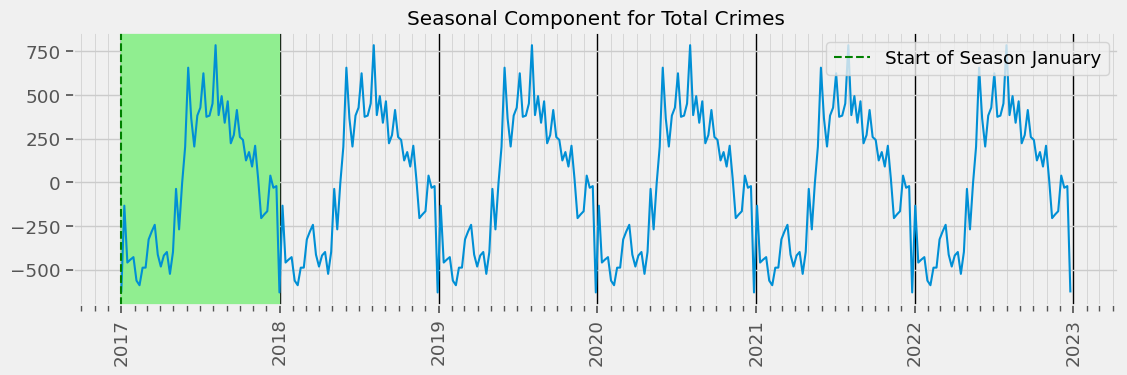

In [92]:
fig, ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();

## Seasonalty on Monthly basses for (motor vehicle theft)

In [93]:
crimes_df

THEFT  SEX OFFENSE  CRIMINAL SEXUAL ASSAULT  ASSAULT  \
Date                                                               
2001-01-01    412           65                        3       70   
2001-01-02    221            4                        0       66   
2001-01-03    226            5                        0       79   
2001-01-04    243            1                        0       57   
2001-01-05    265            2                        0       68   
...           ...          ...                      ...      ...   
2022-12-27    147            2                        4       47   
2022-12-28    112            0                        4       44   
2022-12-29    137            3                        1       38   
2022-12-30    125            0                        4       51   
2022-12-31    102            3                        3       62   

            CRIM SEXUAL ASSAULT  DECEPTIVE PRACTICE  CRIMINAL DAMAGE  \
Date                                                                   
2001-01-01                 38.0                  94              233   
2001-01-02                  2.0                  78              118   
2001-01-03                  7.0                  49              136   
2001-01-04                  2.0                  42              133   
2001-01-05                  6.0                  53              142   
...                         ...                 ...              ...   
2022-12-27                  0.0                  40               64   
2022-12-28                  0.0                  38               78   
2022-12-29                  0.0                  38               95   
2022-12-30                  0.0                  43              100   
2022-12-31                  0.0                  43              128   

            OFFENSE INVOLVING CHILDREN  OTHER OFFENSE  BATTERY  BURGLARY  \
Date                                                                       
2001-01-01                         100            167      296        66   
2001-01-02                           4            101      143        68   
2001-01-03                           3             96      165        57   
2001-01-04                           5             96      173        55   
2001-01-05                           9             90      178        55   
...                                ...            ...      ...       ...   
2022-12-27                           4             33       76        17   
2022-12-28                           3             38      102        23   
2022-12-29                           3             37       97        29   
2022-12-30                           4             38      106        18   
2022-12-31                           5             37      122        21   

            MOTOR VEHICLE THEFT  WEAPONS VIOLATION  CRIMINAL TRESPASS  \
Date                                                                    
2001-01-01                   60                 32                 29   
2001-01-02                   65                  9                 35   
2001-01-03                   72                  7                 35   
2001-01-04                   87                  9                 29   
2001-01-05                   86                  6                 29   
...                         ...                ...                ...   
2022-12-27                   77                 12                 20   
2022-12-28                  103                 17                 12   
2022-12-29                   95                 11                 12   
2022-12-30                   95                 23                 11   
2022-12-31                   88                 58                 14   

            ROBBERY  NARCOTICS  LIQUOR LAW VIOLATION  PUBLIC PEACE VIOLATION  \
Date                                                                           
2001-01-01       41         97                     3                       5   
2001-01-02 

In [94]:
crimes_ts = crimes_df.loc['2017':'2021', 'MOTOR VEHICLE THEFT']

/tmp/ipython-input-544851844.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plot_df_M = crimes_ts.resample('M').sum()


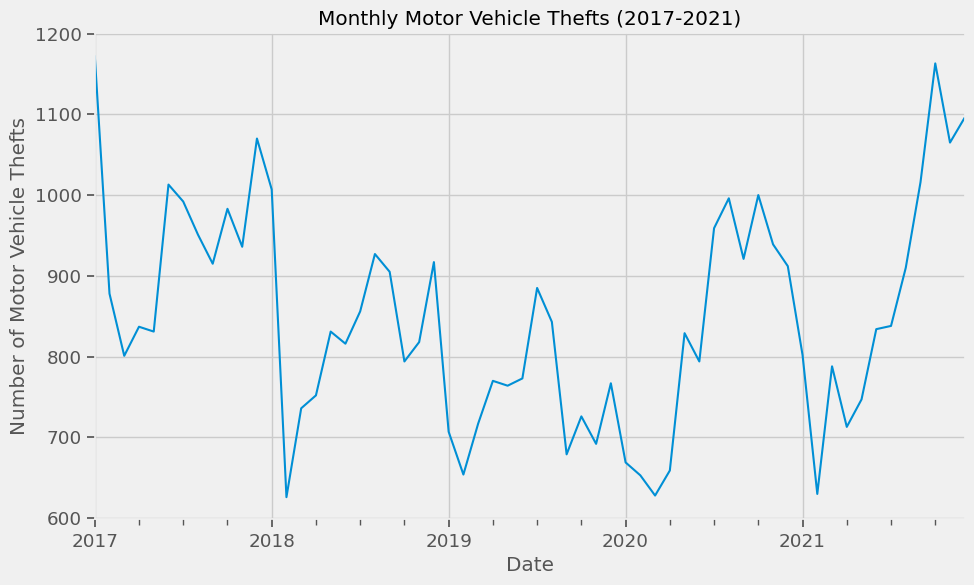

In [95]:
plot_df_M = crimes_ts.resample('M').sum()
plot_df_M.plot(grid=True,figsize=(10,6), ylabel='Number of Motor Vehicle Thefts', title='Monthly Motor Vehicle Thefts (2017-2021)');

### Reasampling to three months to smooth the plot in order to notice better if there is seasoning

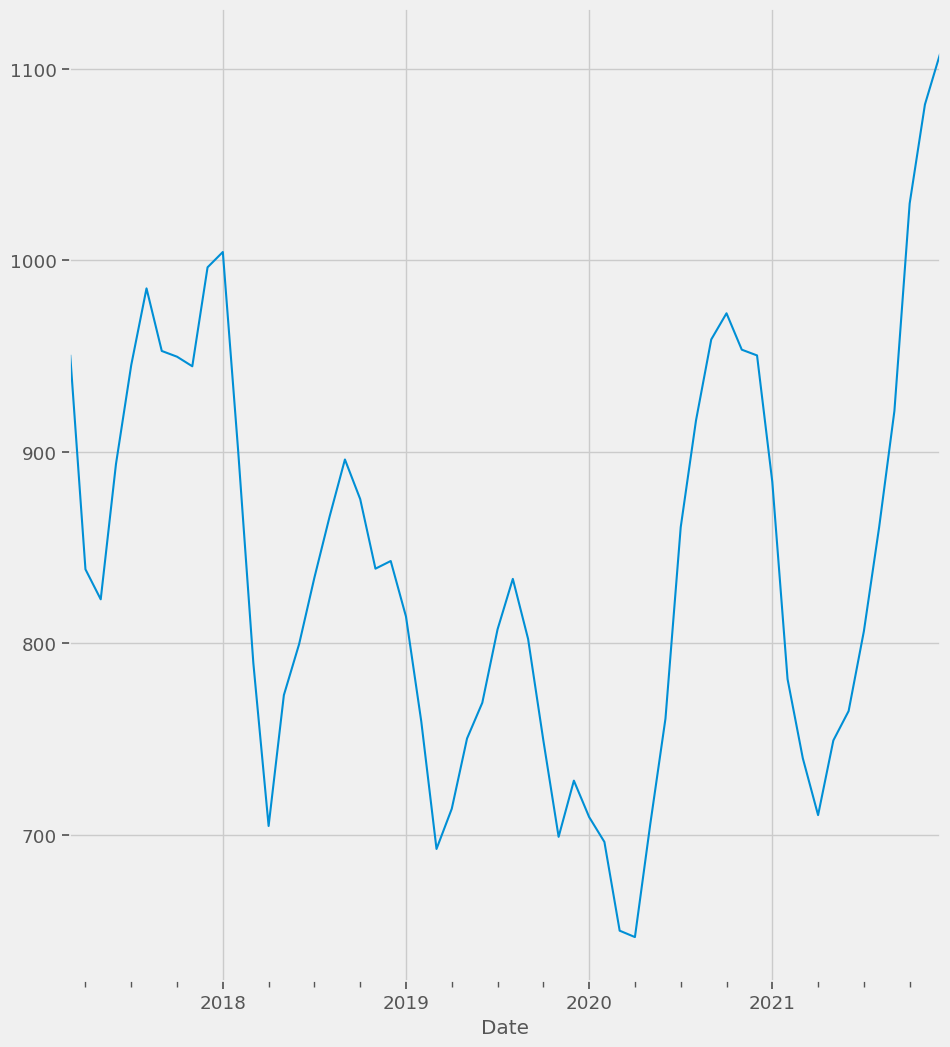

In [96]:
plot_df_M.rolling(3).mean().dropna().plot(figsize=(10,12));

<Axes: title={'center': 'MOTOR VEHICLE THEFT'}, xlabel='Date'>

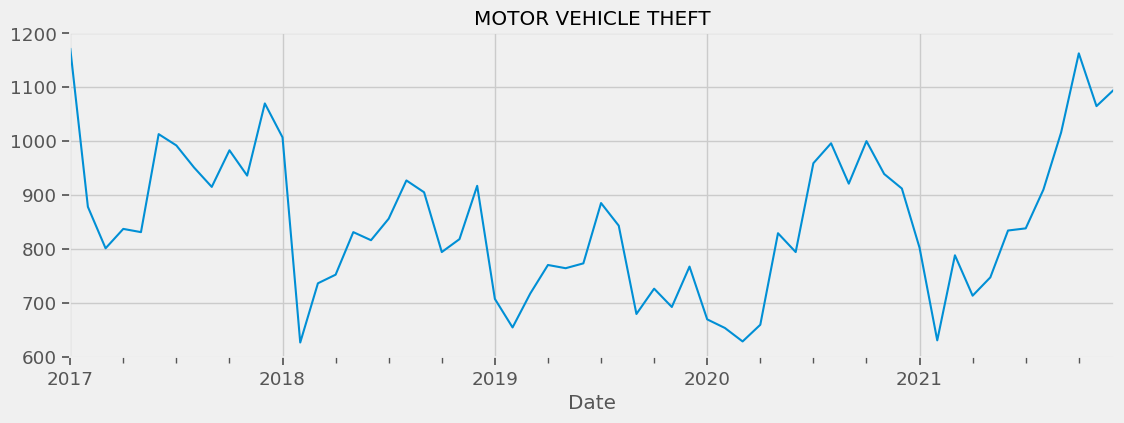

In [97]:
crime_type = "MOTOR VEHICLE THEFT"
# ts = plot_df_M[crime_type] # This line caused the error
plot_df_M.plot(title=crime_type) # Use plot_df_M directly for plotting

### Using decomp for montly motor vehichle theft

In [98]:
decomp = tsa.seasonal_decompose(plot_df_M)
decomp

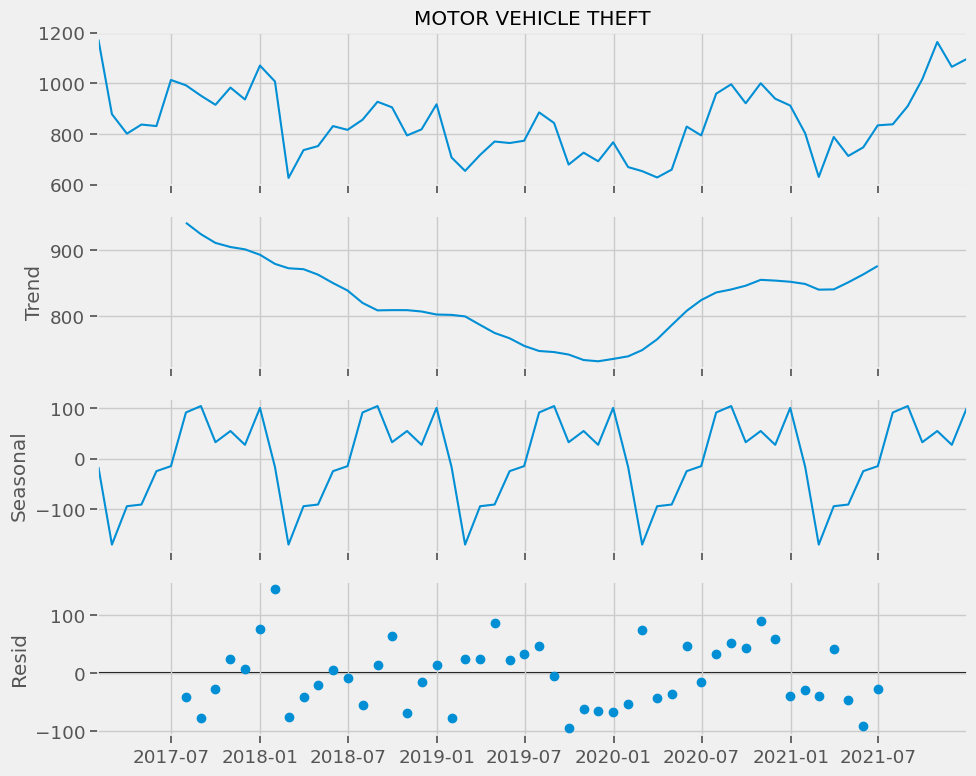

In [99]:
fig = decomp.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

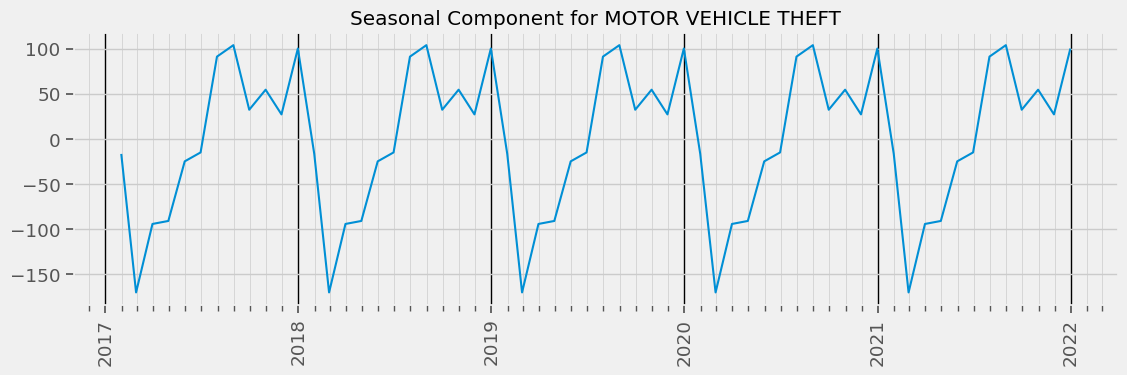

In [100]:
seasonal = decomp.seasonal
minor_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
ax.plot(seasonal)
ax.set(title=f'Seasonal Component for {crime_type}');
ax.xaxis.set_minor_locator(minor_loc)
ax.grid(which='major', axis='x',lw=1, color='k')
ax.grid(which='minor',axis='x',lw=0.5)
fig.autofmt_xdate(rotation=90, ha='center')

1) Determining Seasonal Fluctuation - Magnitude

In [101]:
seasonal.max()
seasonal.min()
magnitude = seasonal.max() - seasonal.min()
magnitude

273.9479166666667

we have 274 car vehichal theft each month

2) Determining the Duration of a Season

In [102]:
print(seasonal.idxmax())

print(seasonal.idxmin())

delta = seasonal.idxmax() - seasonal.idxmin()
delta

2017-08-31 00:00:00
2017-02-28 00:00:00


Timedelta('184 days 00:00:00')

Duration of the season is 184 days

3) plotting the duration

In [103]:
delta = seasonal.idxmax() - seasonal.idxmin()
delta

Timedelta('184 days 00:00:00')

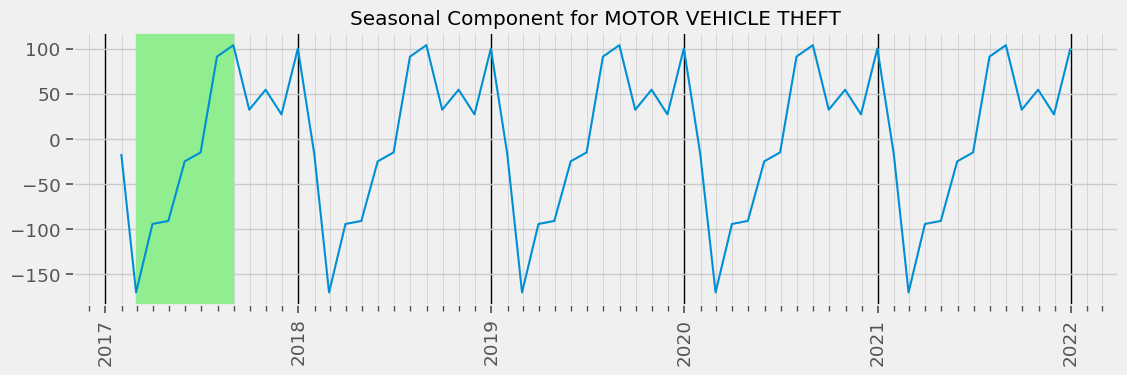

In [104]:
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for {crime_type}');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax

fig, ax = plot_seasonal(seasonal)
ax.axvspan(seasonal.idxmin(),seasonal.idxmax(), color='lightgreen');



4) calculating the full period of seasonality

In [105]:
peaks, props = find_peaks(seasonal, height=seasonal.max())
peak_dates = seasonal.index[peaks]
peak_dates

DatetimeIndex(['2017-08-31', '2018-08-31', '2019-08-31', '2020-08-31',
               '2021-08-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [106]:
period = peak_dates[1] - peak_dates[0]
period

Timedelta('365 days 00:00:00')

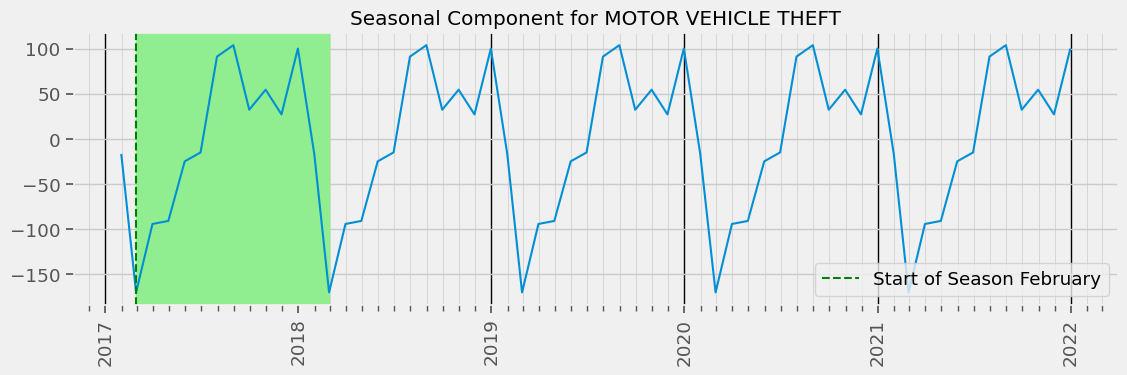

In [107]:
fig, ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();


In [108]:
# Group by HourOfDay and Primary Type and count the occurrences
hourly_crime_type_counts = df.groupby(['HourOfDay', 'Primary Type']).size().unstack(fill_value=0)

# Display the resulting DataFrame
display(hourly_crime_type_counts.head())

Primary Type  ARSON  ASSAULT  BATTERY  BURGLARY  \
HourOfDay                                         
0              1063    17034    71777     19588   
1              1065    13037    67110     10140   
2              1058    10711    59843      9589   
3               984     7869    48380      9224   
4               884     5937    34153      8767   

Primary Type  CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
HourOfDay                                                              
0                                            49                 3775   
1                                            54                 1620   
2                                            39                 1695   
3                                            28                 1582   
4                                            30                 1317   

Primary Type  CRIMINAL DAMAGE  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  \
HourOfDay                                                                   
0                       64386                     1347               7556   
1                       37668                      324               5634   
2                       32357                      355               4683   
3                       27114                      332               3713   
4                       21219                      227               2998   

Primary Type  DECEPTIVE PRACTICE  DOMESTIC VIOLENCE  GAMBLING  HOMICIDE  \
HourOfDay                                                                 
0                          40410                  0       338       806   
1                           4390                  0       169       790   
2                           3868                  1        92       726   
3                           3292                  0        53       589   
4                           2515                  0        28       486   

Primary Type  HUMAN TRAFFICKING  INTERFERENCE WITH PUBLIC OFFICER  \
HourOfDay                                                           
0                            31                              1043   
1                             1                               871   
2                             0                               682   
3                             1                               419   
4                             0                               287   

Primary Type  INTIMIDATION  KIDNAPPING  LIQUOR LAW VIOLATION  \
HourOfDay                                                      
0                      154         133                   932   
1                       71         112                   776   
2                       58          84                   606   
3                       31          75                   355   
4                       40          70                   151   

Primary Type  MOTOR VEHICLE THEFT  NARCOTICS  NON - CRIMINAL  NON-CRIMINAL  \
HourOfDay                                                                    
0                           23712      25153               1             6   
1                           12550      14893               0             1   
2                           10249       9451               0             2   
3                            8243       6411               0             2   
4                            6747       3984               0             1   

Primary Type  NON-CRIMINAL (SUBJECT SPECIFIED)  OBSCENITY  \
HourOfDay                                                   
0                                            0        107   
1                                            1         13   
2                                            0          8   
3                                            0         11   
4                                            0          8   

Primary Type  OFFENSE INVOLVING CHILDREN  OTHER NARCOTIC VIOLATION  \
HourOfDay                                                            
0                      